In [ ]:
import pandas as pd
df=pd.read_csv("/dermatology_database_1.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.isna().sum()

,0
erythema,0
scaling,0
definite_borders,0
itching,0
koebner_phenomenon,0
polygonal_papules,0
follicular_papules,0
oral_mucosal_involvement,0
knee_and_elbow_involvement,0
scalp_involvement,0


In [ ]:
for col in df.select_dtypes(include='int64').columns:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   erythema                             366 non-null    category
 1   scaling                              366 non-null    category
 2   definite_borders                     366 non-null    category
 3   itching                              366 non-null    category
 4   koebner_phenomenon                   366 non-null    category
 5   polygonal_papules                    366 non-null    category
 6   follicular_papules                   366 non-null    category
 7   oral_mucosal_involvement             366 non-null    category
 8   knee_and_elbow_involvement           366 non-null    category
 9   scalp_involvement                    366 non-null    category
 10  family_history                       366 non-null    category
 11  melanin_incontinenc

In [ ]:
for col in df.select_dtypes(include='object').columns:
    if col == 'age':
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        df[col] = df[col].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   erythema                             366 non-null    category
 1   scaling                              366 non-null    category
 2   definite_borders                     366 non-null    category
 3   itching                              366 non-null    category
 4   koebner_phenomenon                   366 non-null    category
 5   polygonal_papules                    366 non-null    category
 6   follicular_papules                   366 non-null    category
 7   oral_mucosal_involvement             366 non-null    category
 8   knee_and_elbow_involvement           366 non-null    category
 9   scalp_involvement                    366 non-null    category
 10  family_history                       366 non-null    category
 11  melanin_incontinenc

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
###training and testing data sets
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [ ]:
pip install kmodes

In [ ]:
pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,OrdinalEncoder
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

In [ ]:
scaler = MinMaxScaler()

# Replace '?' with NaN and convert to numeric, coercing errors
X_train['age'] = pd.to_numeric(X_train['age'], errors='coerce')

X_train['age'].fillna(X_train['age'].mean(), inplace=True)

age_scaled = scaler.fit_transform(X_train['age'].values.reshape(-1, 1))
X_train['age'] = age_scaled

print("X_train with scaled 'age' column:")
display(X_train.head())

X_train with scaled 'age' column:


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age
341,1,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0.897059
202,2,2,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3,0,0.661765
75,3,2,1,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,0.264706
84,1,1,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.705882
354,2,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0.720588


In [ ]:
X_train= X_train.to_numpy()
numerical_cols= [33]
categorical_cols=list(range(33))

In [ ]:
# Getting Optimal Customers for Kprototypes using elbow method
cost=[]
# for 2 clusters
kproto= KPrototypes(n_clusters=2, init='Cao')
kproto.fit_predict(X_train, categorical=categorical_cols)
cost.append(kproto.cost_)

# for 3 clusters
kproto= KPrototypes(n_clusters=3, init='Cao')
kproto.fit_predict(X_train, categorical=categorical_cols)
cost.append(kproto.cost_)
# for 4 clusters
kproto= KPrototypes(n_clusters=4, init='Cao')
kproto.fit_predict(X_train, categorical=categorical_cols)
cost.append(kproto.cost_)
# for 5 clusters
kproto= KPrototypes(n_clusters=5, init='Cao')
kproto.fit_predict(X_train, categorical=categorical_cols)
cost.append(kproto.cost_)
# for 6 clusters
kproto= KPrototypes(n_clusters=6, init='Cao')
kproto.fit_predict(X_train, categorical=categorical_cols)
cost.append(kproto.cost_)

# for 7 clusters
kproto= KPrototypes(n_clusters=7, init='Cao')
kproto.fit_predict(X_train, categorical=categorical_cols)
cost.append(kproto.cost_)
# for 8 clusters
kproto= KPrototypes(n_clusters=8, init='Cao')
kproto.fit_predict(X_train, categorical=categorical_cols)
cost.append(kproto.cost_)
# for 9 clusters
kproto= KPrototypes(n_clusters=9, init='Cao')
kproto.fit_predict(X_train, categorical=categorical_cols)
cost.append(kproto.cost_)

the cost for the cluster is the sum of all the dissimilarities within that cluster. And then total cost for say k =3 is the sum of cost for all 3 clusters. Similar to WCSS thing for Kmeans but treating categorical and numerical disimilarites seperately and adding them up.

In [ ]:
cost

[np.float64(308.44671283431484),
 np.float64(277.8222062893537),
 np.float64(286.386725320007),
 np.float64(255.93947853248483),
 np.float64(253.96243849306117)]

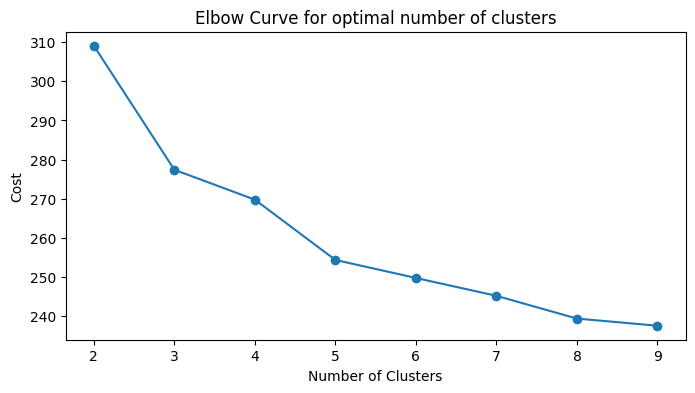

In [ ]:
# plot the elbow curve
plt.figure(figsize=(8,4))
plt.plot([2,3,4,5,6,7,8,9],cost,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve for optimal number of clusters')
plt.show()

In [ ]:
# for 3 clusters
kproto= KPrototypes(n_clusters=3, init='Cao')
kproto.fit_predict(X_train, categorical=categorical_cols)


array([0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1,
       0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0,
       1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0,
       0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 1,
       0, 0, 0, 0, 0, 1], dtype=uint16)

In [ ]:
# Convert X_train back to a pandas DataFrame to add the clusters column
# Use original column names
original_cols = df.drop("class", axis=1).columns
X_train_df = pd.DataFrame(X_train, columns=original_cols)

X_train_df['clusters'] = kproto.labels_

display(X_train_df.head())

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,clusters
0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.897059,0
1,2.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.661765,0
2,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.264706,0
3,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.705882,0
4,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.720588,0


In [ ]:
# prompt: to get cluster sizes

cluster_sizes = X_train_df['clusters'].value_counts().sort_index()
print("Cluster Sizes:")
cluster_sizes

Cluster Sizes:


,count
clusters,
0,156
1,79
2,57



Class Distribution within Clusters:


class,1,2,3,4,5,6
clusters,,,,,,
0,3,52,2,41,42,16
1,78,0,0,0,0,1
2,0,0,57,0,0,0



Percentage of Class Distribution within Clusters:


class,1,2,3,4,5,6
clusters,,,,,,
0,1.923077,33.333333,1.282051,26.282051,26.923077,10.256410
1,98.734177,0.000000,0.000000,0.000000,0.000000,1.265823
2,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000


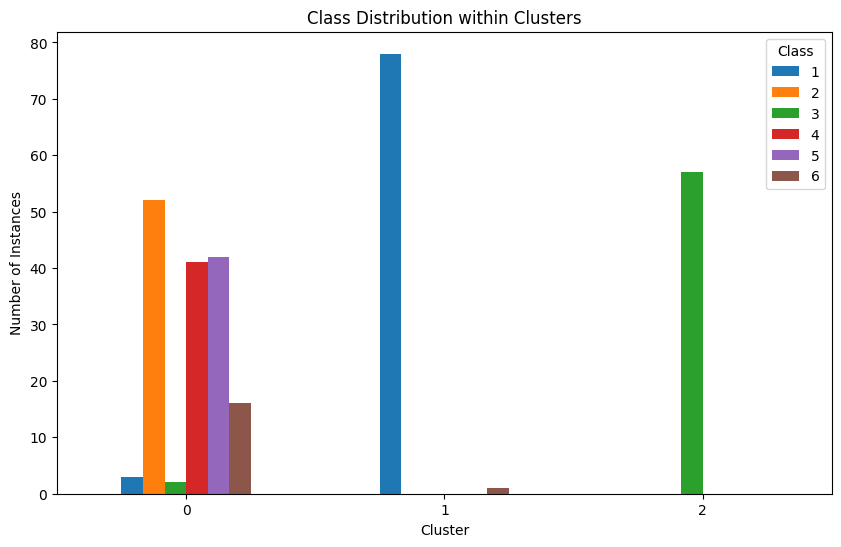

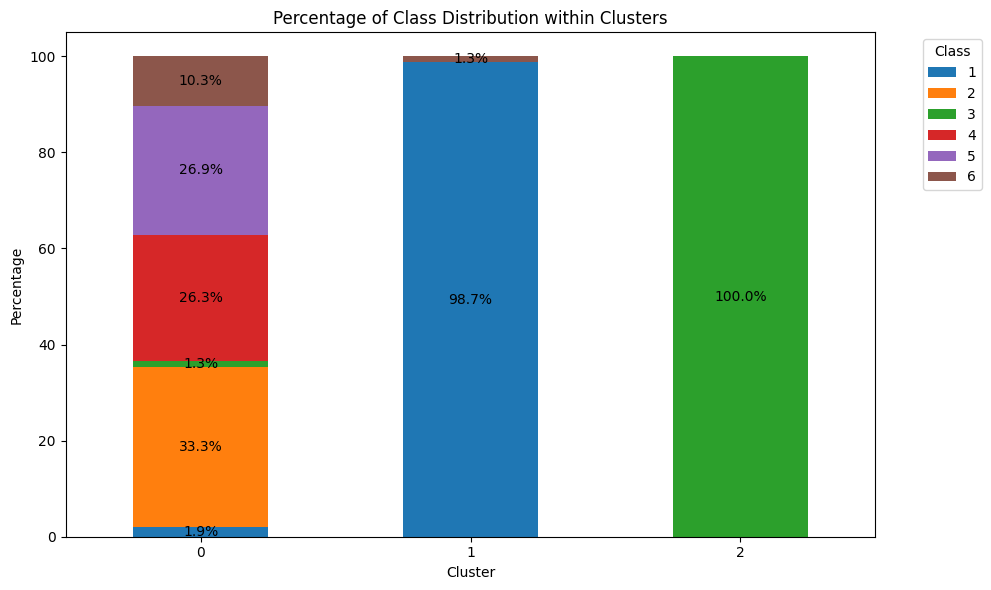

In [ ]:
# prompt: can i now combine xtrain and ytrain to get distribution of the classes between clusters also add precentage within cluters within plot

import pandas as pd
import matplotlib.pyplot as plt
# Combine X_train and y_train into a single DataFrame
train_data_with_clusters = pd.concat([X_train_df, y_train.reset_index(drop=True)], axis=1)

# Get the distribution of classes within each cluster
class_distribution = train_data_with_clusters.groupby('clusters')['class'].value_counts().unstack(fill_value=0)

# Calculate the percentage within each cluster
class_distribution_percentage = class_distribution.apply(lambda x: x / x.sum() * 100, axis=1)

print("\nClass Distribution within Clusters:")
display(class_distribution)

print("\nPercentage of Class Distribution within Clusters:")
display(class_distribution_percentage)

# Plotting the distribution of classes within clusters
class_distribution.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Class Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.show()

# Plotting the percentage of classes within clusters
class_distribution_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Class Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add text labels for percentages on the stacked bars
for container in plt.gca().containers:
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in container]
    plt.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.show()

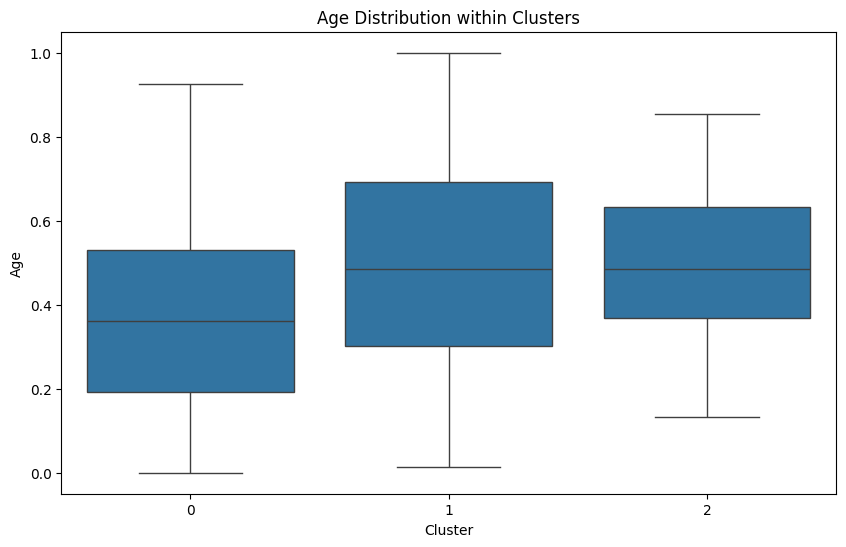

In [ ]:
# prompt: can i get age distribution within clusters with box plots in one plot

import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for age distribution within each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='clusters', y='age', data=train_data_with_clusters)
plt.title('Age Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

In [ ]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   feature_0          292 non-null    float64
 1   feature_1          292 non-null    float64
 2   feature_2          292 non-null    float64
 3   feature_3          292 non-null    float64
 4   feature_4          292 non-null    float64
 5   feature_5          292 non-null    float64
 6   feature_6          292 non-null    float64
 7   feature_7          292 non-null    float64
 8   feature_8          292 non-null    float64
 9   feature_9          292 non-null    float64
 10  feature_10         292 non-null    float64
 11  feature_11         292 non-null    float64
 12  feature_12         292 non-null    float64
 13  feature_13         292 non-null    float64
 14  feature_14         292 non-null    float64
 15  feature_15         292 non-null    float64
 16  feature_16         292 non


Categorical Feature Distribution within Clusters:

--- Distribution of erythema within Clusters ---


erythema,0,1,2,3
clusters,,,,
0,2,37,88,29
1,1,4,47,27
2,0,5,40,12


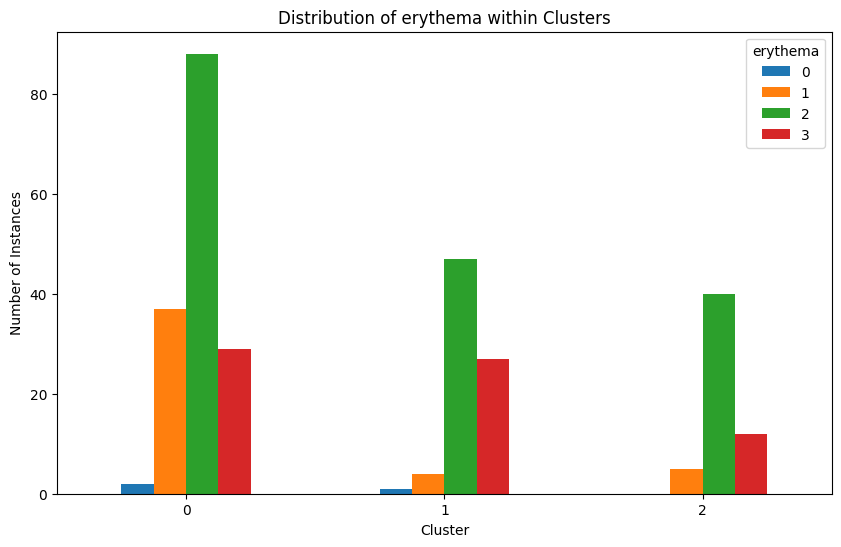


Percentage Distribution of erythema within Clusters:


erythema,0,1,2,3
clusters,,,,
0,1.282051,23.717949,56.410256,18.589744
1,1.265823,5.063291,59.493671,34.177215
2,0.000000,8.771930,70.175439,21.052632


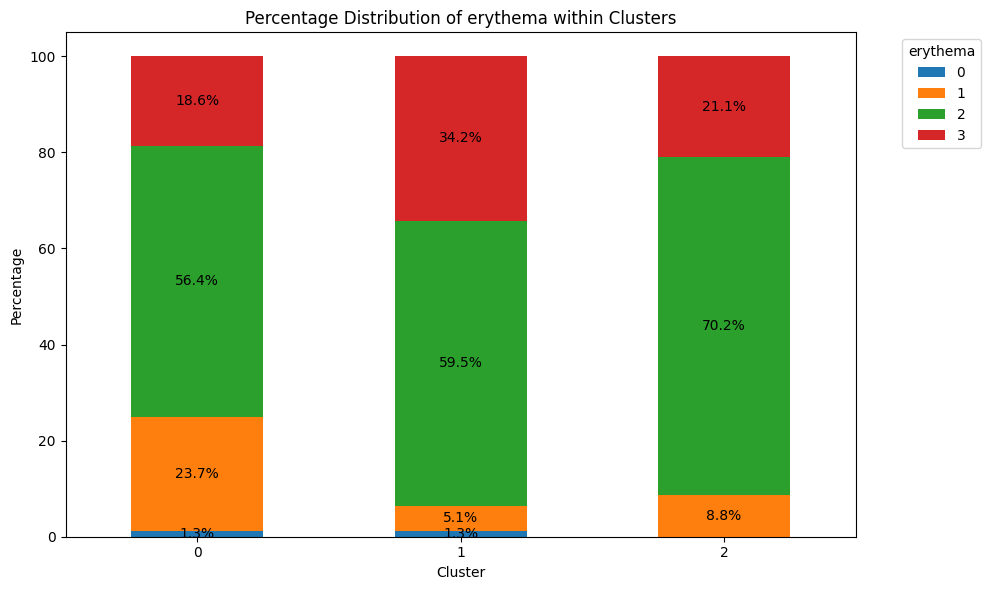


--- Distribution of scaling within Clusters ---


scaling,0,1,2,3
clusters,,,,
0,6,55,82,13
1,0,11,44,24
2,1,19,32,5


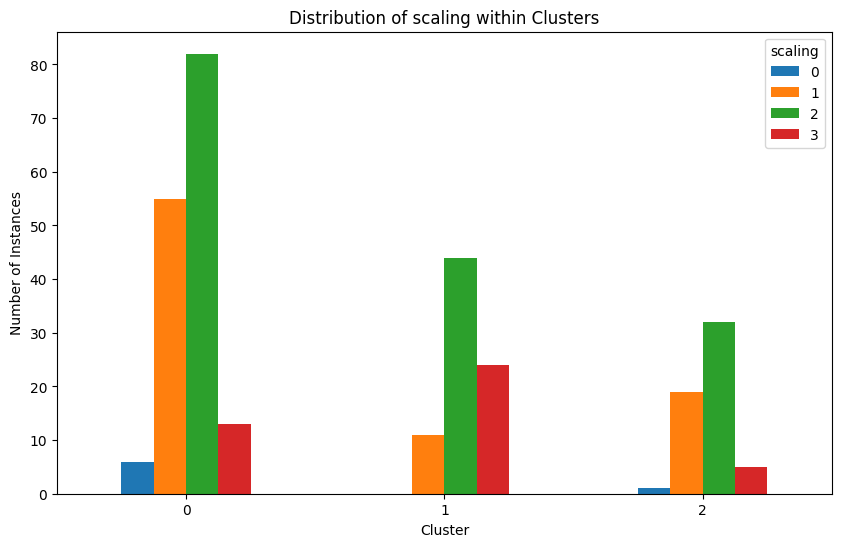


Percentage Distribution of scaling within Clusters:


scaling,0,1,2,3
clusters,,,,
0,3.846154,35.256410,52.564103,8.333333
1,0.000000,13.924051,55.696203,30.379747
2,1.754386,33.333333,56.140351,8.771930


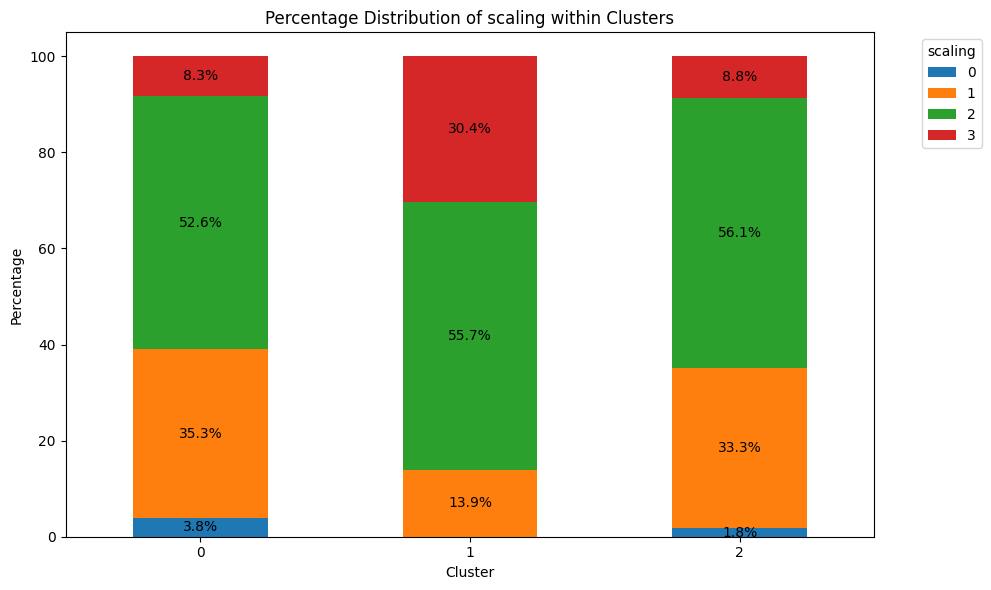


--- Distribution of definite_borders within Clusters ---


definite_borders,0,1,2,3
clusters,,,,
0,49,59,45,3
1,0,6,54,19
2,0,4,38,15


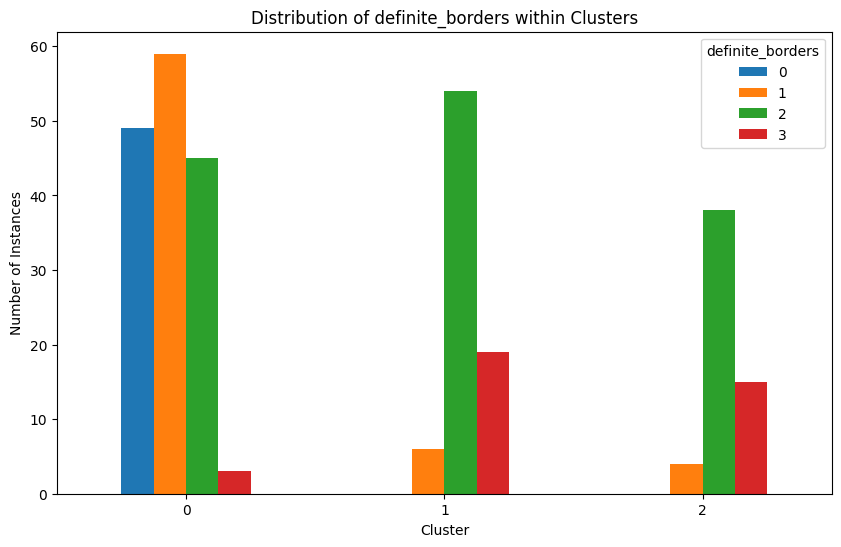


Percentage Distribution of definite_borders within Clusters:


definite_borders,0,1,2,3
clusters,,,,
0,31.410256,37.820513,28.846154,1.923077
1,0.000000,7.594937,68.354430,24.050633
2,0.000000,7.017544,66.666667,26.315789


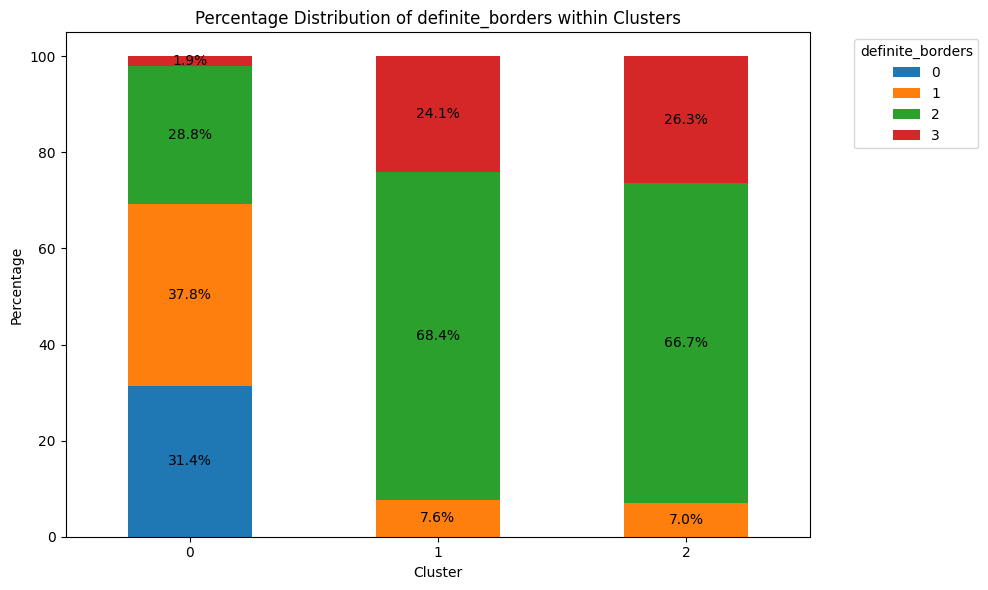


--- Distribution of itching within Clusters ---


itching,0,1,2,3
clusters,,,,
0,54,32,45,25
1,40,15,15,9
2,1,5,22,29


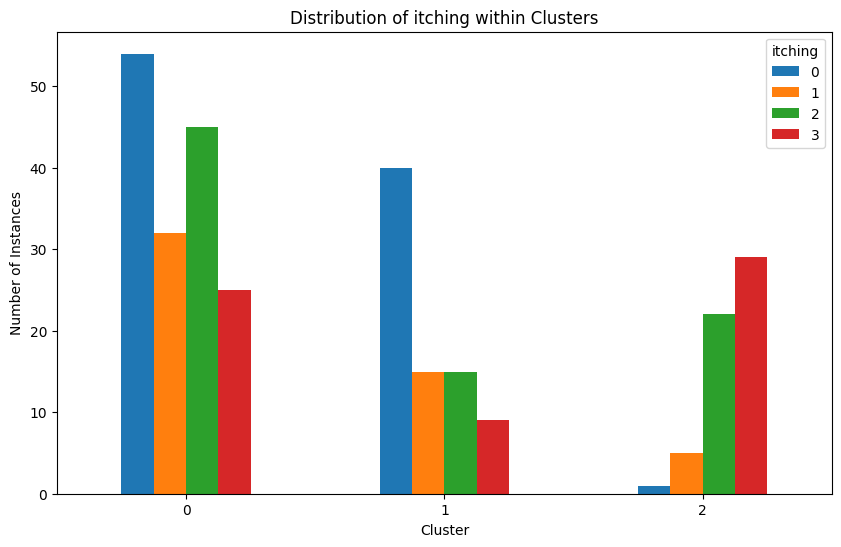


Percentage Distribution of itching within Clusters:


itching,0,1,2,3
clusters,,,,
0,34.615385,20.512821,28.846154,16.025641
1,50.632911,18.987342,18.987342,11.392405
2,1.754386,8.771930,38.596491,50.877193


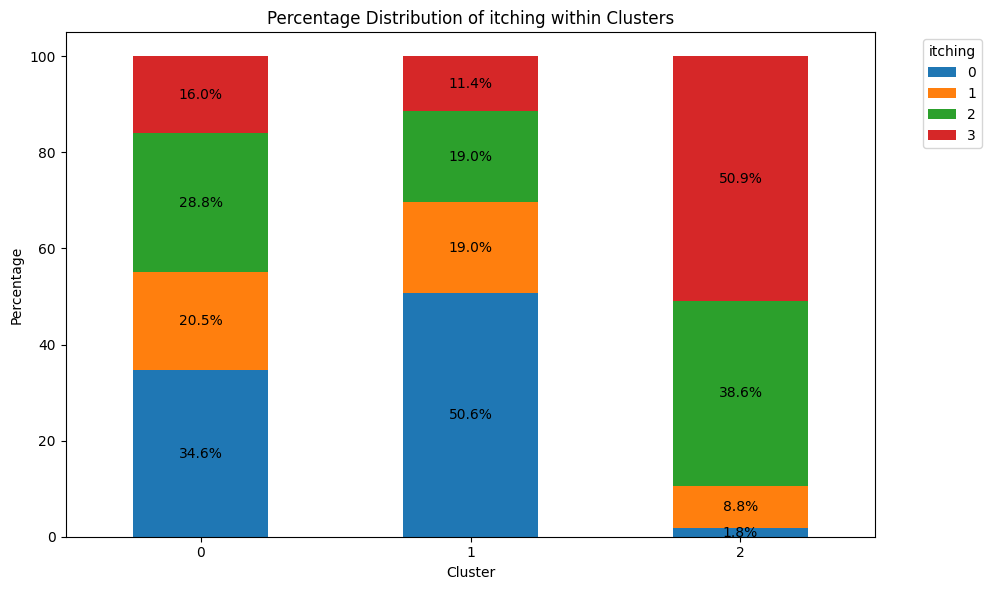


--- Distribution of koebner_phenomenon within Clusters ---


koebner_phenomenon,0,1,2,3
clusters,,,,
0,119,21,14,2
1,45,18,14,2
2,14,14,18,11


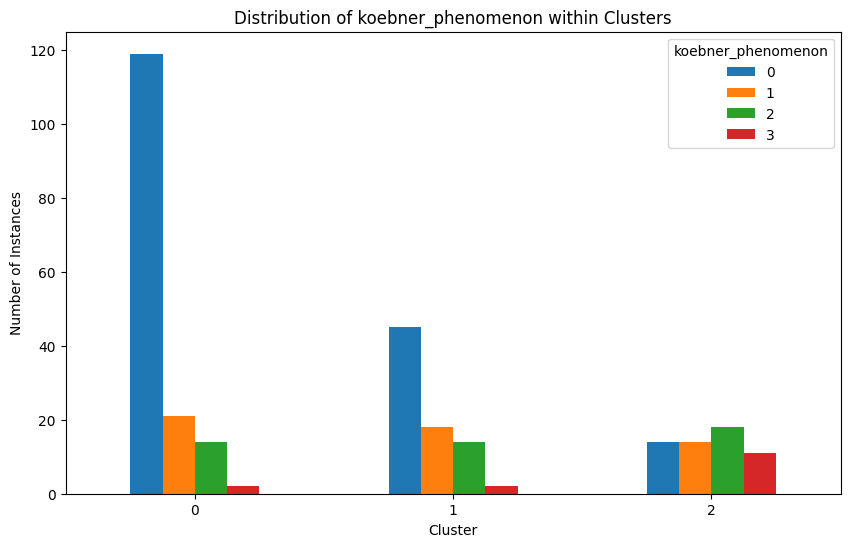


Percentage Distribution of koebner_phenomenon within Clusters:


koebner_phenomenon,0,1,2,3
clusters,,,,
0,76.282051,13.461538,8.974359,1.282051
1,56.962025,22.784810,17.721519,2.531646
2,24.561404,24.561404,31.578947,19.298246


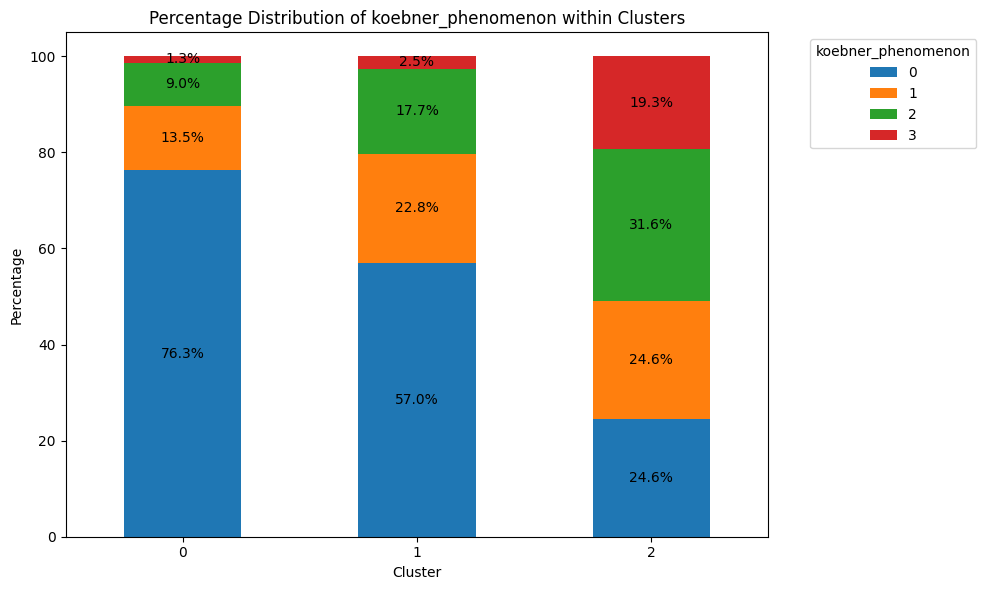


--- Distribution of polygonal_papules within Clusters ---


polygonal_papules,0,1,2,3
clusters,,,,
0,154,0,1,1
1,79,0,0,0
2,1,1,34,21


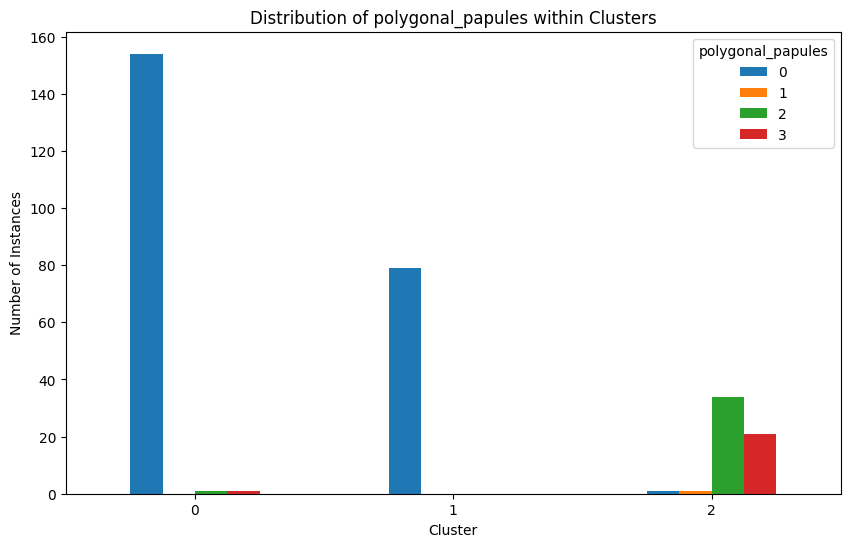


Percentage Distribution of polygonal_papules within Clusters:


polygonal_papules,0,1,2,3
clusters,,,,
0,98.717949,0.000000,0.641026,0.641026
1,100.000000,0.000000,0.000000,0.000000
2,1.754386,1.754386,59.649123,36.842105


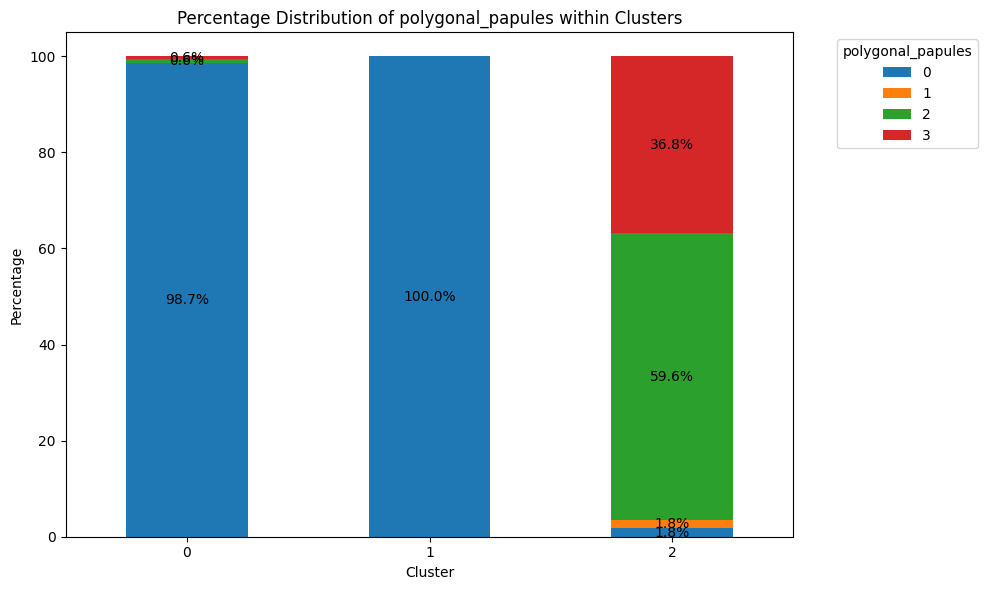


--- Distribution of follicular_papules within Clusters ---


follicular_papules,0,1,2,3
clusters,,,,
0,131,9,11,5
1,75,2,1,1
2,57,0,0,0


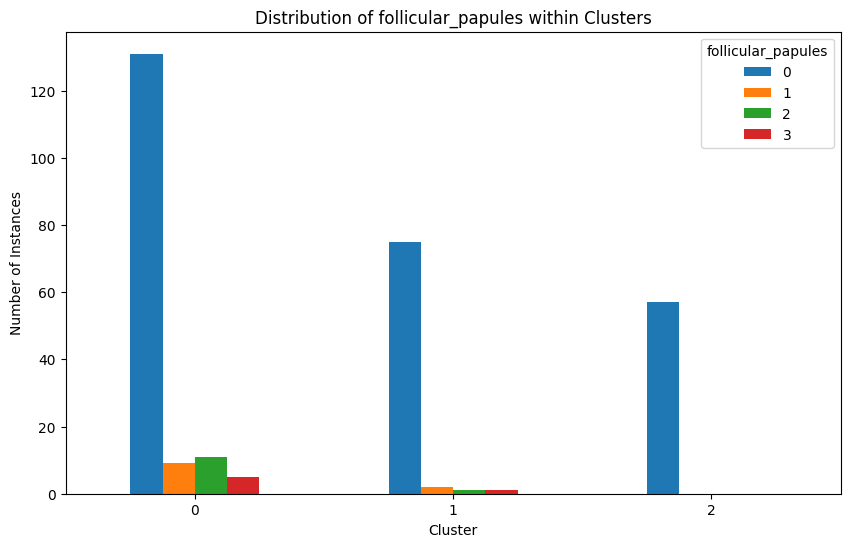


Percentage Distribution of follicular_papules within Clusters:


follicular_papules,0,1,2,3
clusters,,,,
0,83.974359,5.769231,7.051282,3.205128
1,94.936709,2.531646,1.265823,1.265823
2,100.000000,0.000000,0.000000,0.000000


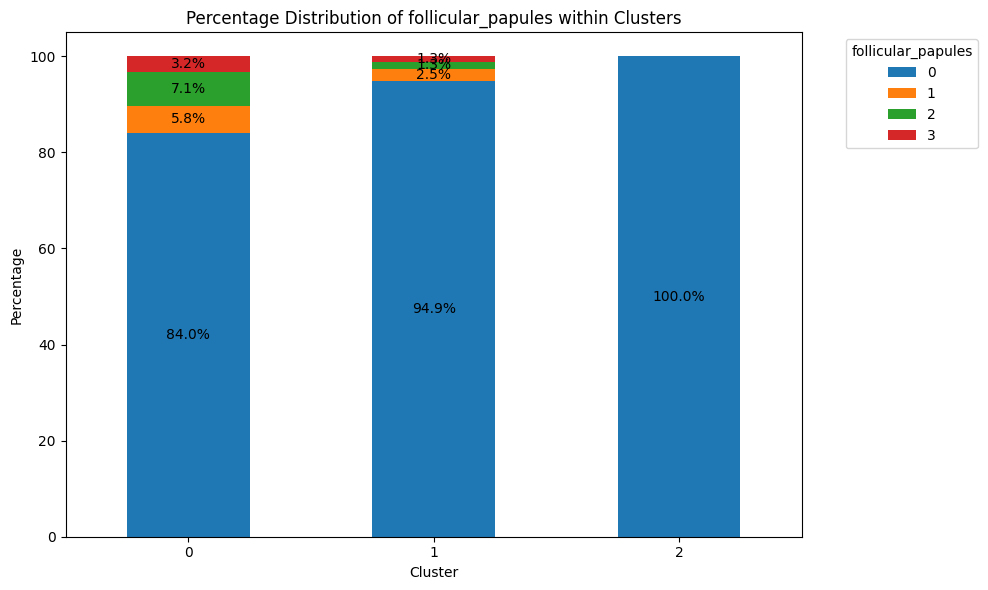


--- Distribution of oral_mucosal_involvement within Clusters ---


oral_mucosal_involvement,0,1,2,3
clusters,,,,
0,154,0,2,0
1,79,0,0,0
2,4,6,35,12


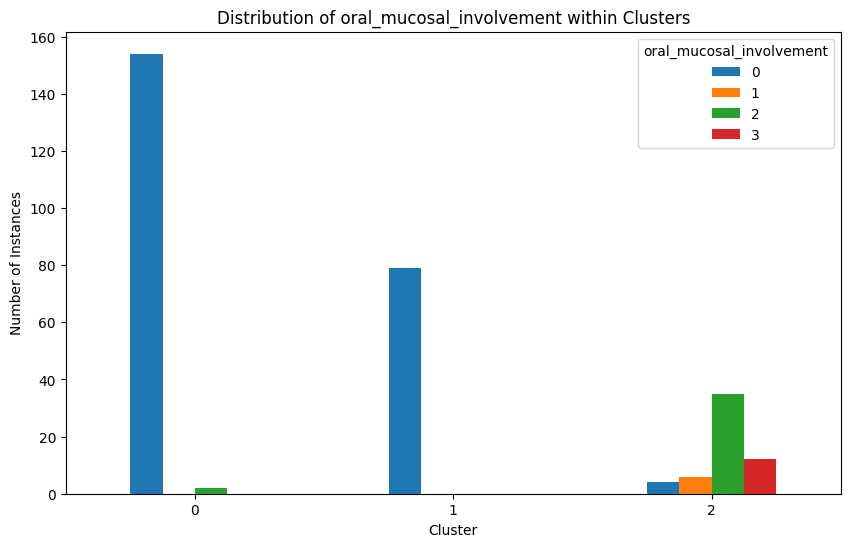


Percentage Distribution of oral_mucosal_involvement within Clusters:


oral_mucosal_involvement,0,1,2,3
clusters,,,,
0,98.717949,0.000000,1.282051,0.000000
1,100.000000,0.000000,0.000000,0.000000
2,7.017544,10.526316,61.403509,21.052632


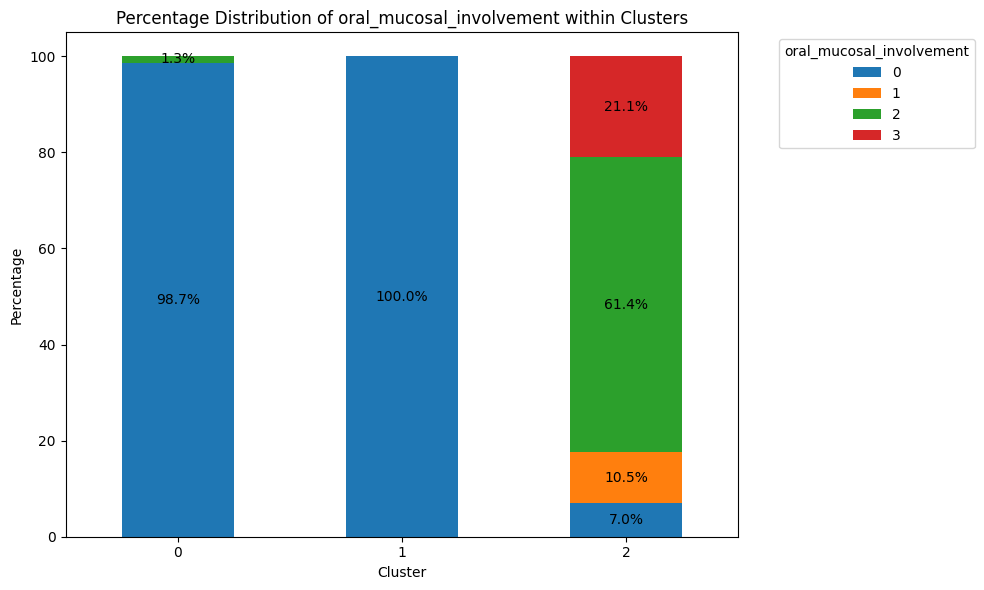


--- Distribution of knee_and_elbow_involvement within Clusters ---


knee_and_elbow_involvement,0,1,2,3
clusters,,,,
0,135,11,7,3
1,14,11,39,15
2,56,0,1,0


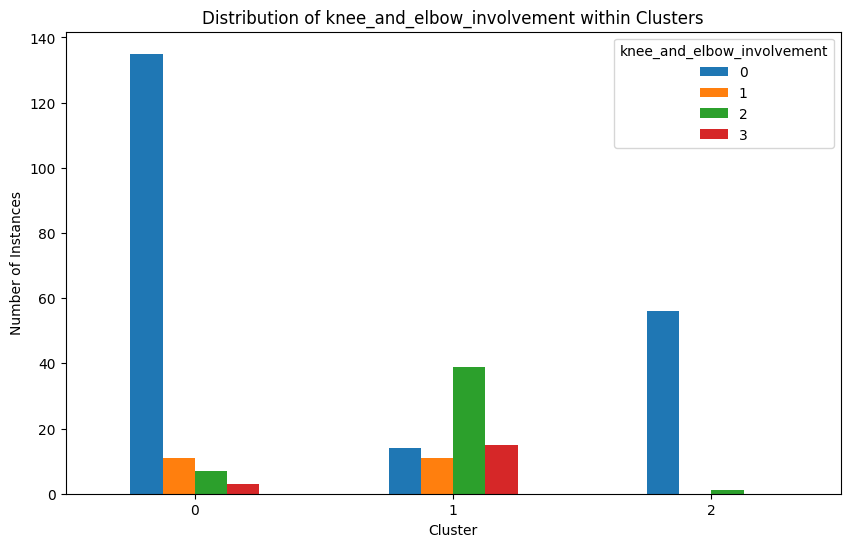


Percentage Distribution of knee_and_elbow_involvement within Clusters:


knee_and_elbow_involvement,0,1,2,3
clusters,,,,
0,86.538462,7.051282,4.487179,1.923077
1,17.721519,13.924051,49.367089,18.987342
2,98.245614,0.000000,1.754386,0.000000


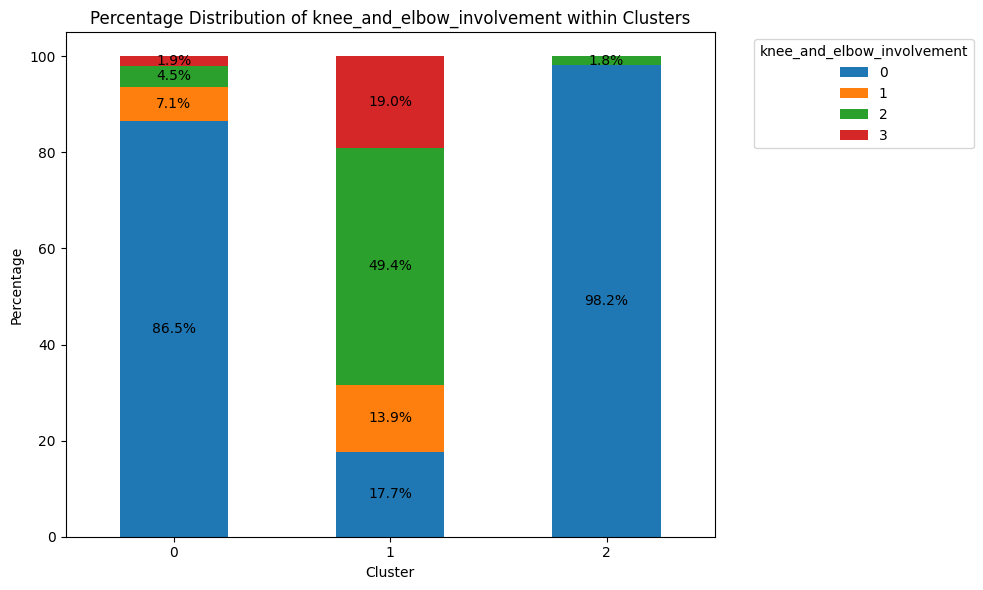


--- Distribution of scalp_involvement within Clusters ---


scalp_involvement,0,1,2,3
clusters,,,,
0,145,6,5,0
1,14,15,36,14
2,55,2,0,0


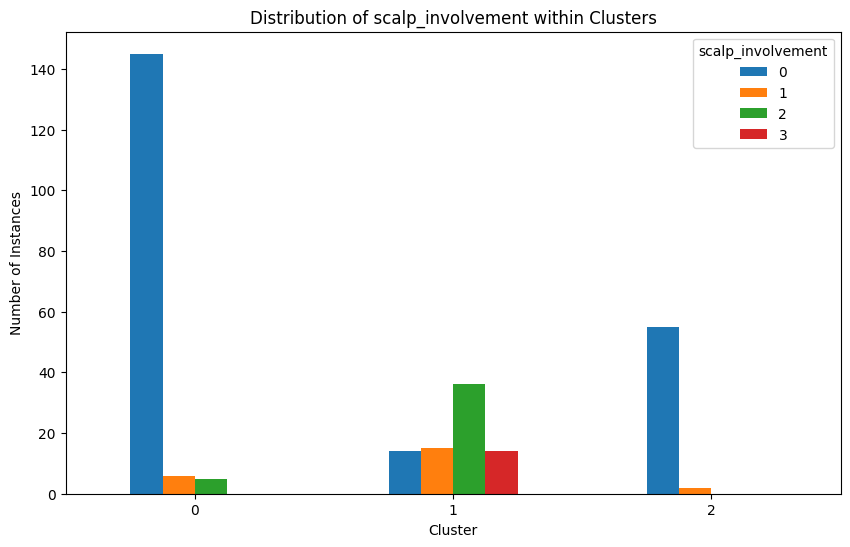


Percentage Distribution of scalp_involvement within Clusters:


scalp_involvement,0,1,2,3
clusters,,,,
0,92.948718,3.846154,3.205128,0.000000
1,17.721519,18.987342,45.569620,17.721519
2,96.491228,3.508772,0.000000,0.000000


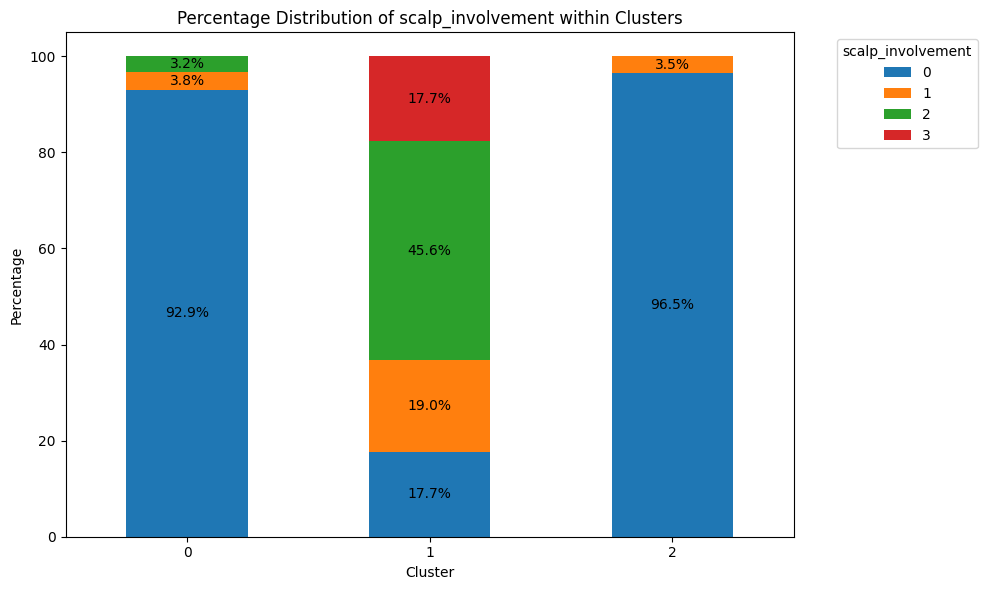


--- Distribution of family_history within Clusters ---


family_history,0,1
clusters,,
0,144,12
1,58,21
2,56,1


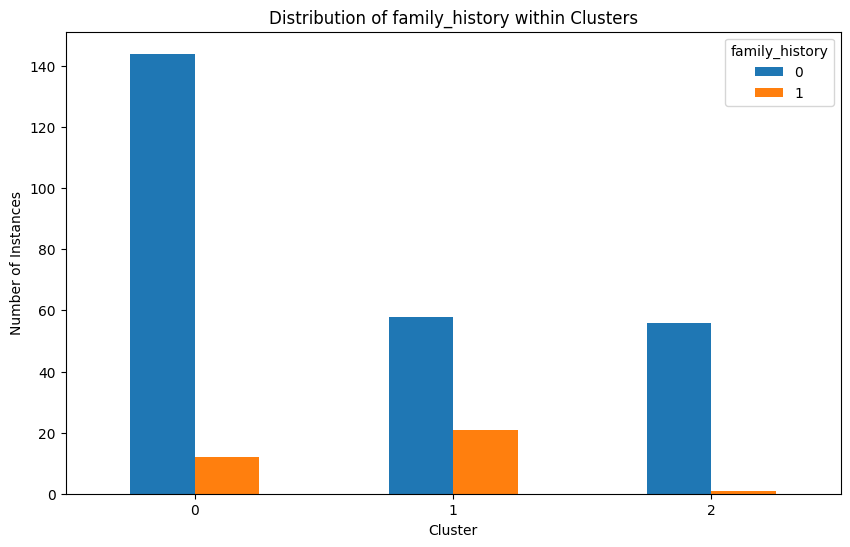


Percentage Distribution of family_history within Clusters:


family_history,0,1
clusters,,
0,92.307692,7.692308
1,73.417722,26.582278
2,98.245614,1.754386


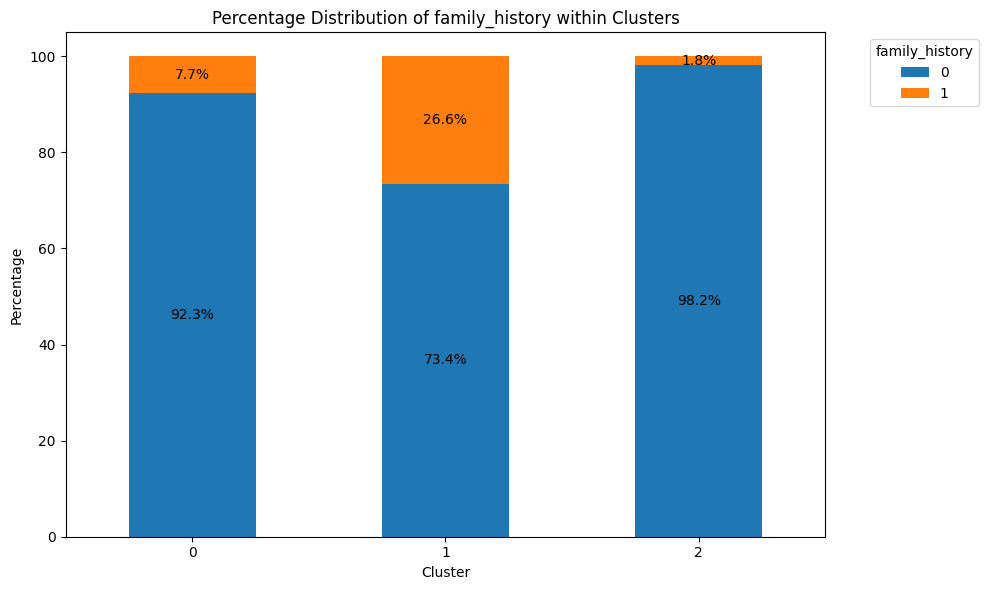


--- Distribution of melanin_incontinence within Clusters ---


melanin_incontinence,0,1,2,3
clusters,,,,
0,155,0,0,1
1,79,0,0,0
2,1,6,37,13


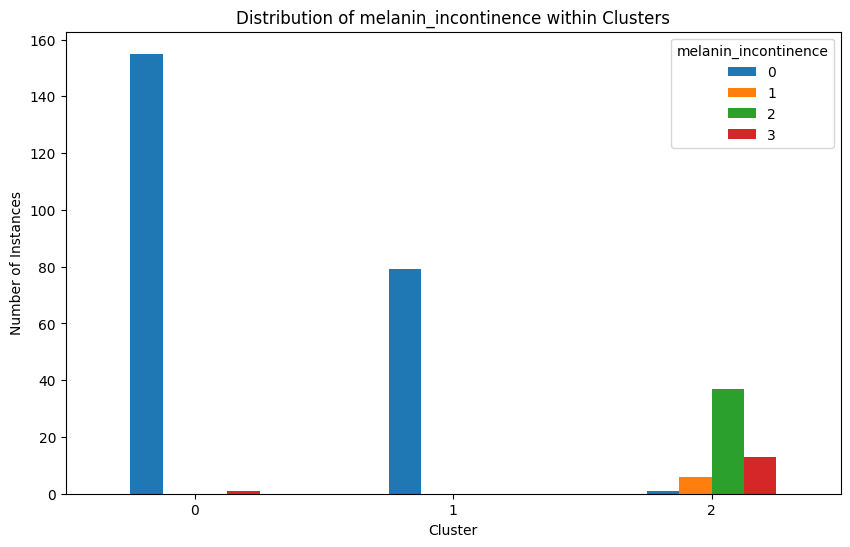


Percentage Distribution of melanin_incontinence within Clusters:


melanin_incontinence,0,1,2,3
clusters,,,,
0,99.358974,0.000000,0.000000,0.641026
1,100.000000,0.000000,0.000000,0.000000
2,1.754386,10.526316,64.912281,22.807018


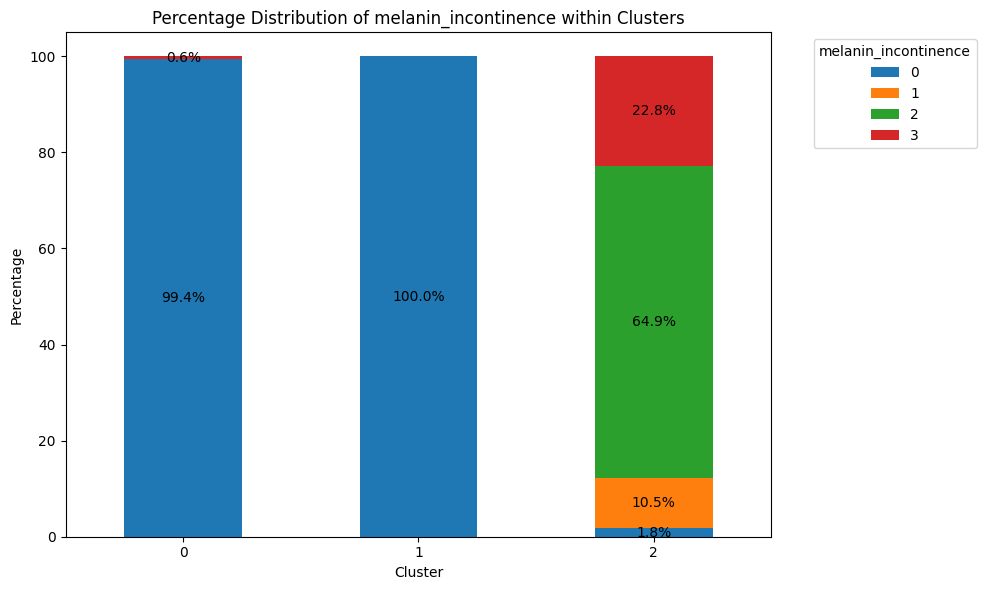


--- Distribution of eosinophils_infiltrate within Clusters ---


eosinophils_infiltrate,0,1,2
clusters,,,
0,134,18,4
1,77,1,1
2,49,6,2


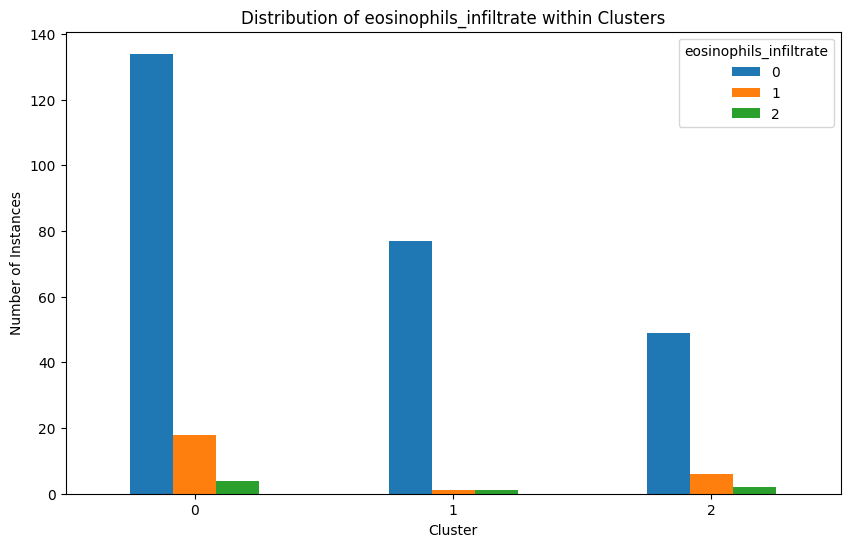


Percentage Distribution of eosinophils_infiltrate within Clusters:


eosinophils_infiltrate,0,1,2
clusters,,,
0,85.897436,11.538462,2.564103
1,97.468354,1.265823,1.265823
2,85.964912,10.526316,3.508772


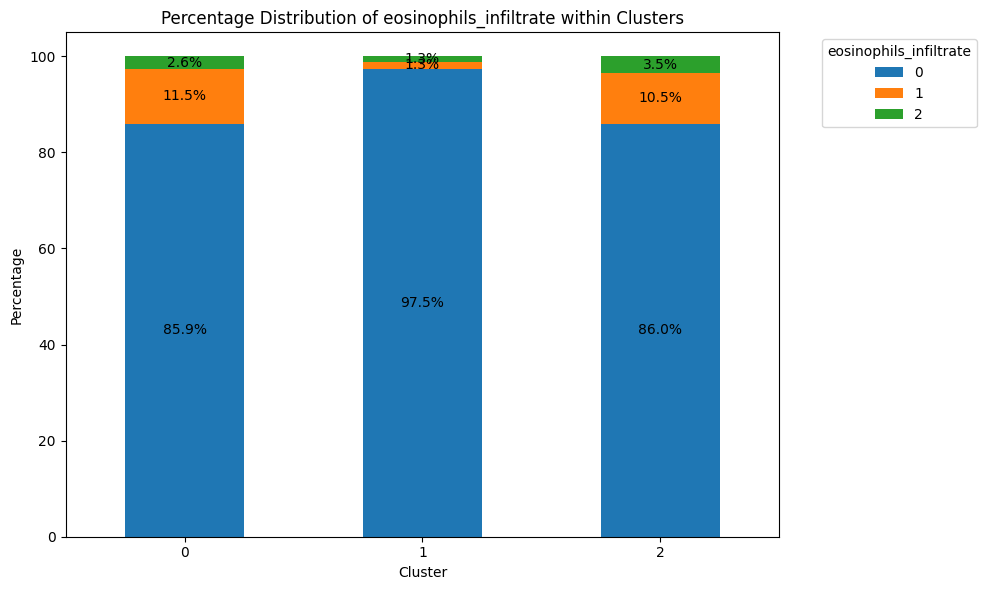


--- Distribution of PNL_infiltrate within Clusters ---


PNL_infiltrate,0,1,2,3
clusters,,,,
0,109,27,19,1
1,25,29,21,4
2,57,0,0,0


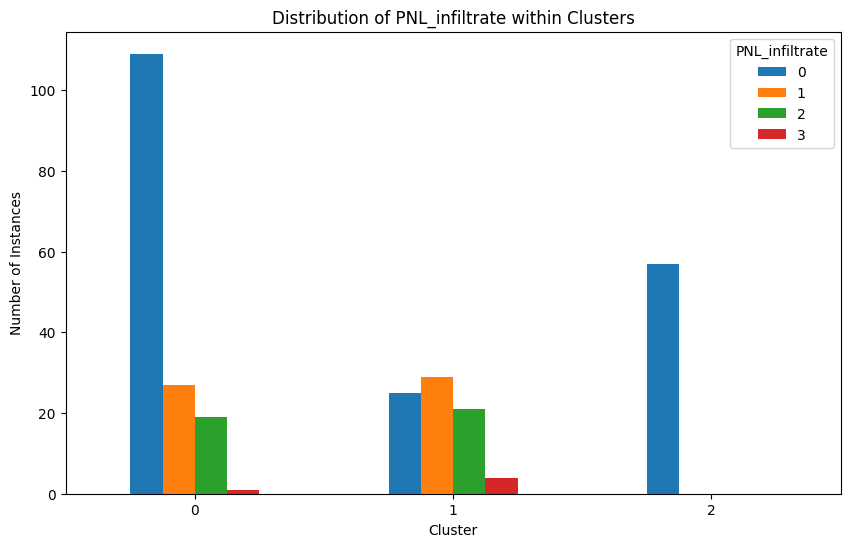


Percentage Distribution of PNL_infiltrate within Clusters:


PNL_infiltrate,0,1,2,3
clusters,,,,
0,69.871795,17.307692,12.179487,0.641026
1,31.645570,36.708861,26.582278,5.063291
2,100.000000,0.000000,0.000000,0.000000


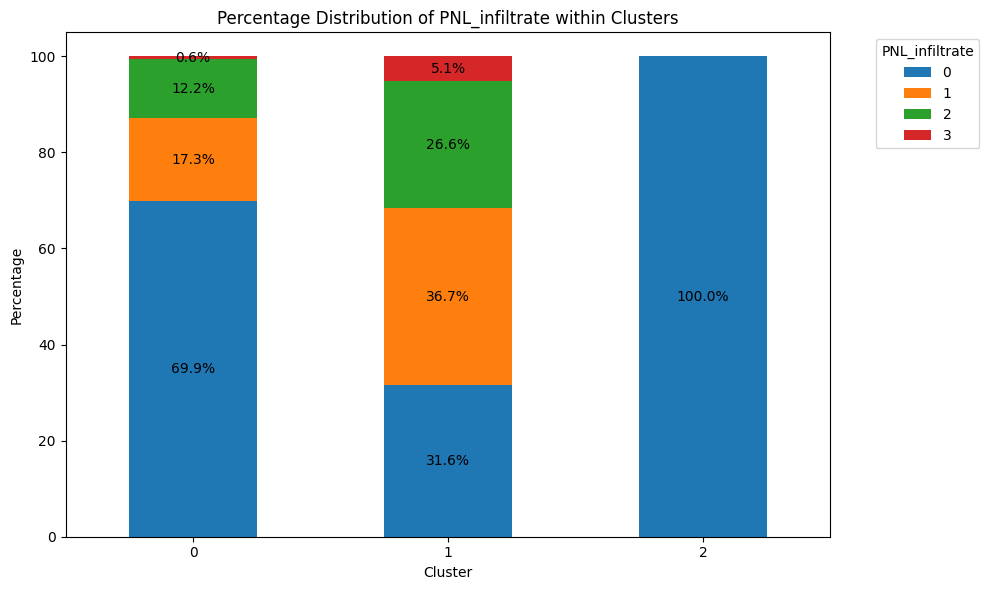


--- Distribution of fibrosis_papillary_dermis within Clusters ---


fibrosis_papillary_dermis,0,1,2,3
clusters,,,,
0,113,5,18,20
1,79,0,0,0
2,56,0,1,0


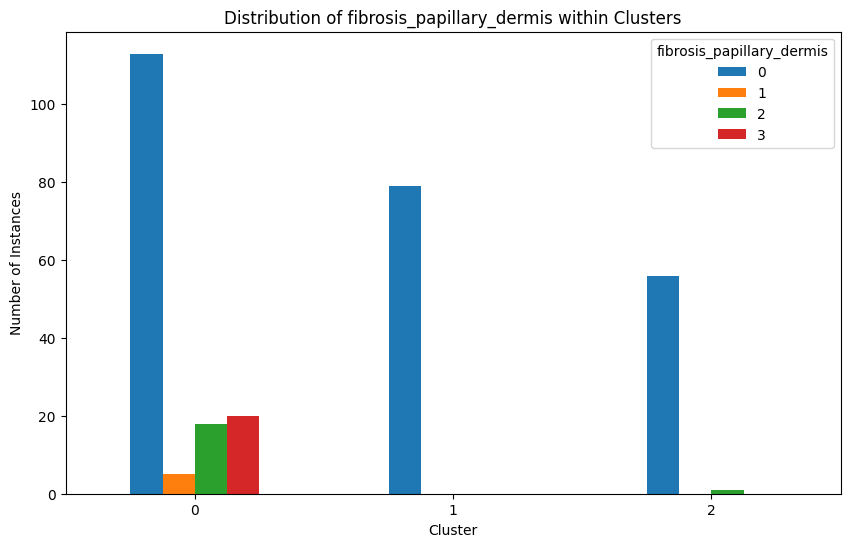


Percentage Distribution of fibrosis_papillary_dermis within Clusters:


fibrosis_papillary_dermis,0,1,2,3
clusters,,,,
0,72.435897,3.205128,11.538462,12.820513
1,100.000000,0.000000,0.000000,0.000000
2,98.245614,0.000000,1.754386,0.000000


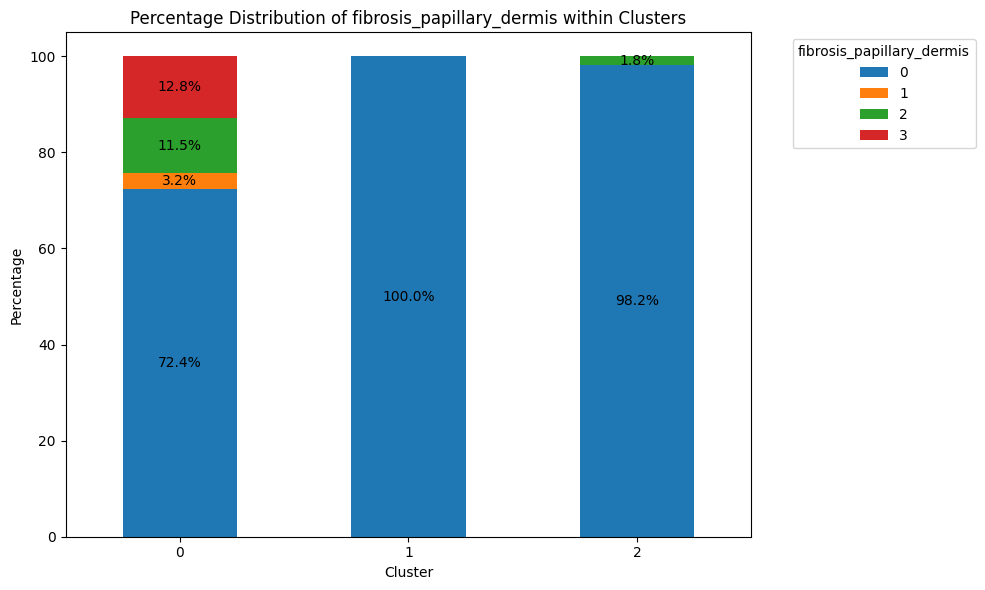


--- Distribution of exocytosis within Clusters ---


exocytosis,0,1,2,3
clusters,,,,
0,21,37,67,31
1,67,6,6,0
2,1,6,33,17


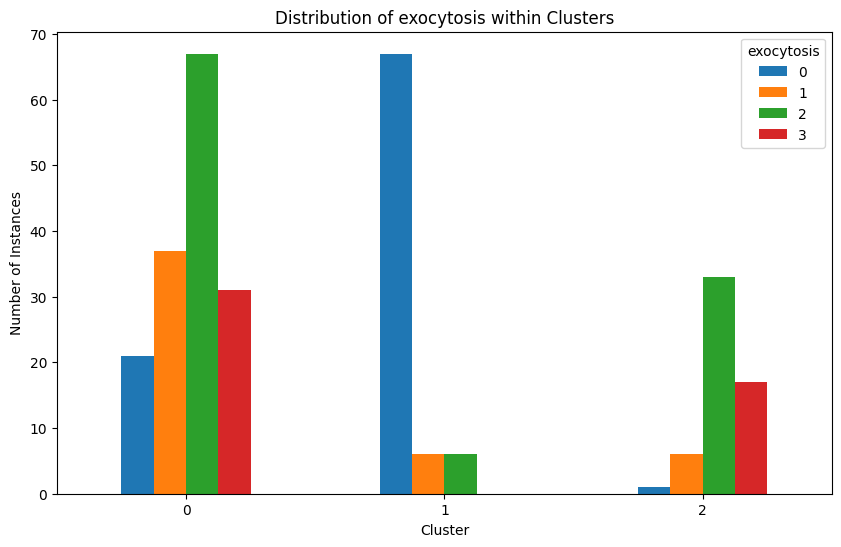


Percentage Distribution of exocytosis within Clusters:


exocytosis,0,1,2,3
clusters,,,,
0,13.461538,23.717949,42.948718,19.871795
1,84.810127,7.594937,7.594937,0.000000
2,1.754386,10.526316,57.894737,29.824561


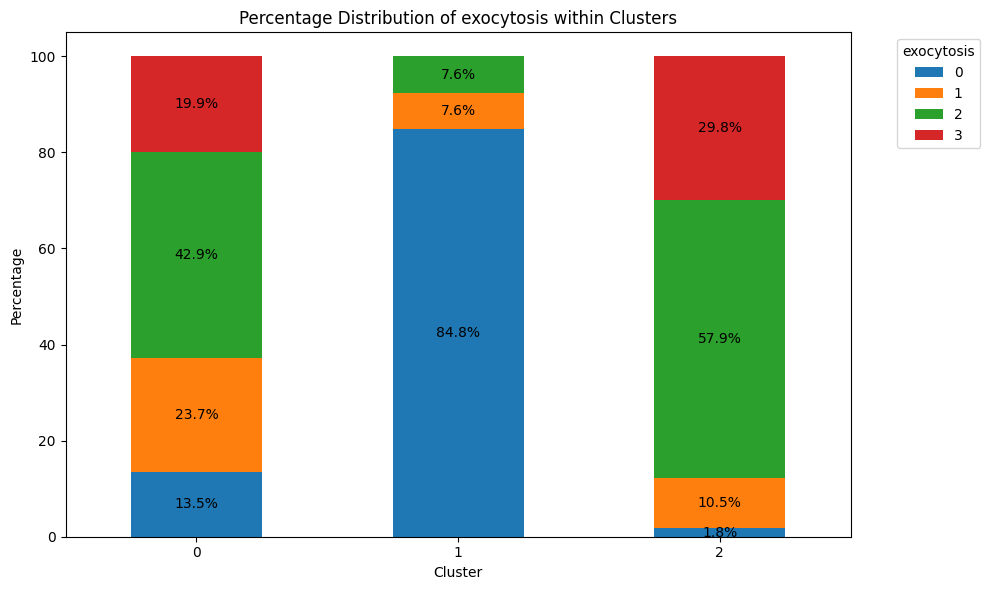


--- Distribution of acanthosis within Clusters ---


acanthosis,0,1,2,3
clusters,,,,
0,9,44,77,26
1,1,12,48,18
2,0,7,33,17


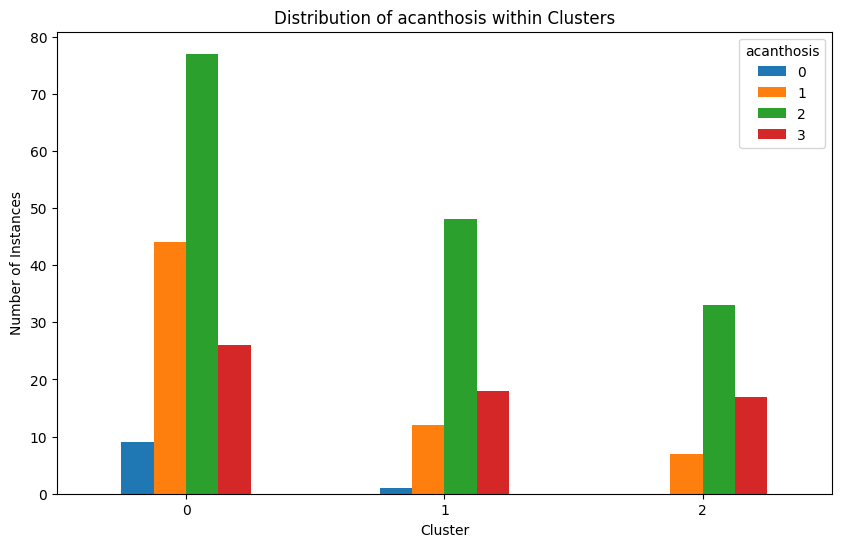


Percentage Distribution of acanthosis within Clusters:


acanthosis,0,1,2,3
clusters,,,,
0,5.769231,28.205128,49.358974,16.666667
1,1.265823,15.189873,60.759494,22.784810
2,0.000000,12.280702,57.894737,29.824561


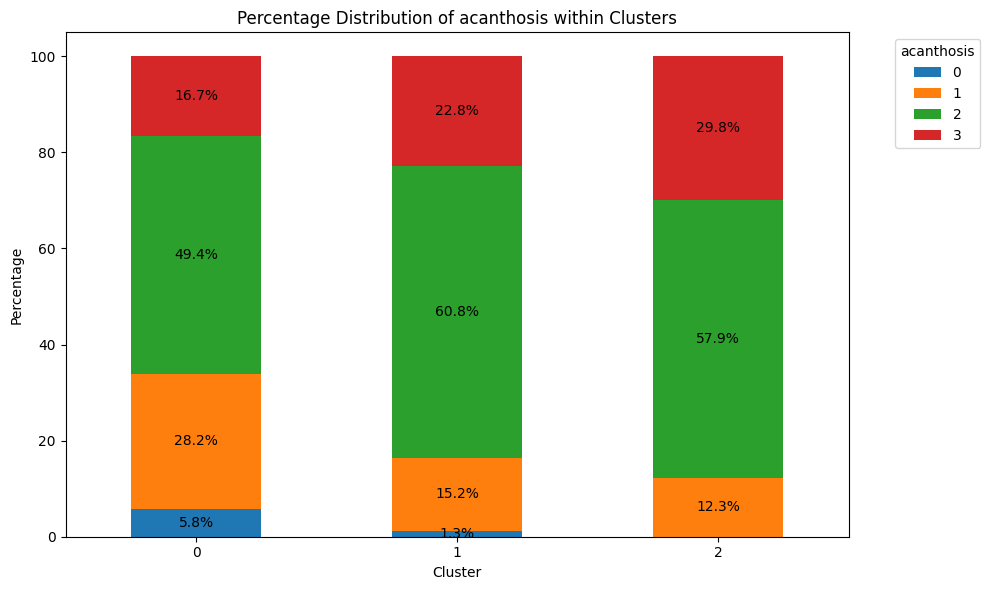


--- Distribution of hyperkeratosis within Clusters ---


hyperkeratosis,0,1,2,3
clusters,,,,
0,101,41,13,1
1,38,20,18,3
2,43,12,2,0


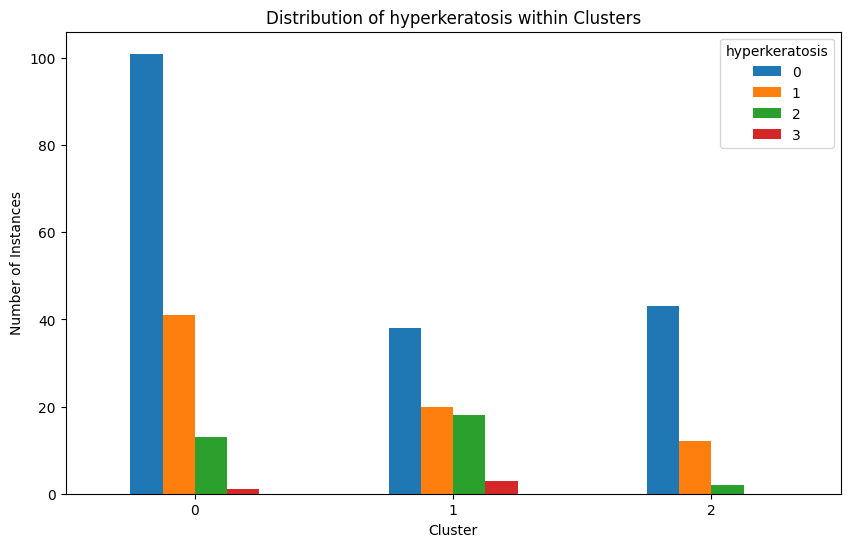


Percentage Distribution of hyperkeratosis within Clusters:


hyperkeratosis,0,1,2,3
clusters,,,,
0,64.743590,26.282051,8.333333,0.641026
1,48.101266,25.316456,22.784810,3.797468
2,75.438596,21.052632,3.508772,0.000000


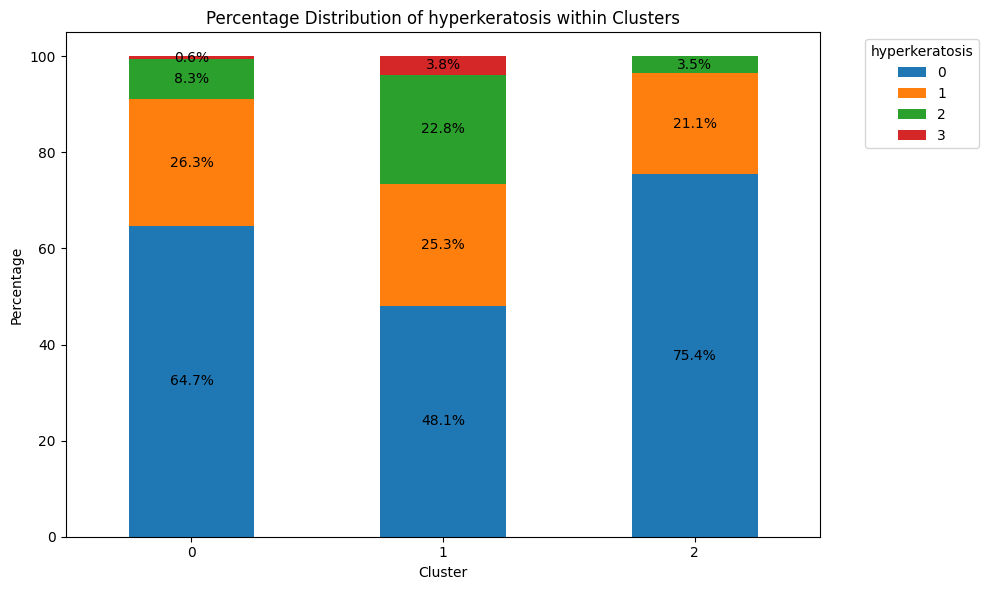


--- Distribution of parakeratosis within Clusters ---


parakeratosis,0,1,2,3
clusters,,,,
0,61,58,34,3
1,0,15,52,12
2,10,24,19,4


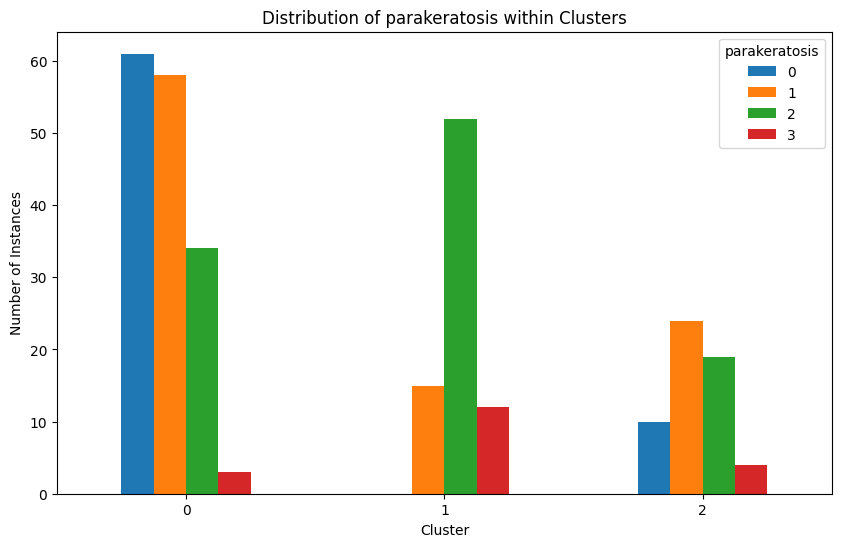


Percentage Distribution of parakeratosis within Clusters:


parakeratosis,0,1,2,3
clusters,,,,
0,39.102564,37.179487,21.794872,1.923077
1,0.000000,18.987342,65.822785,15.189873
2,17.543860,42.105263,33.333333,7.017544


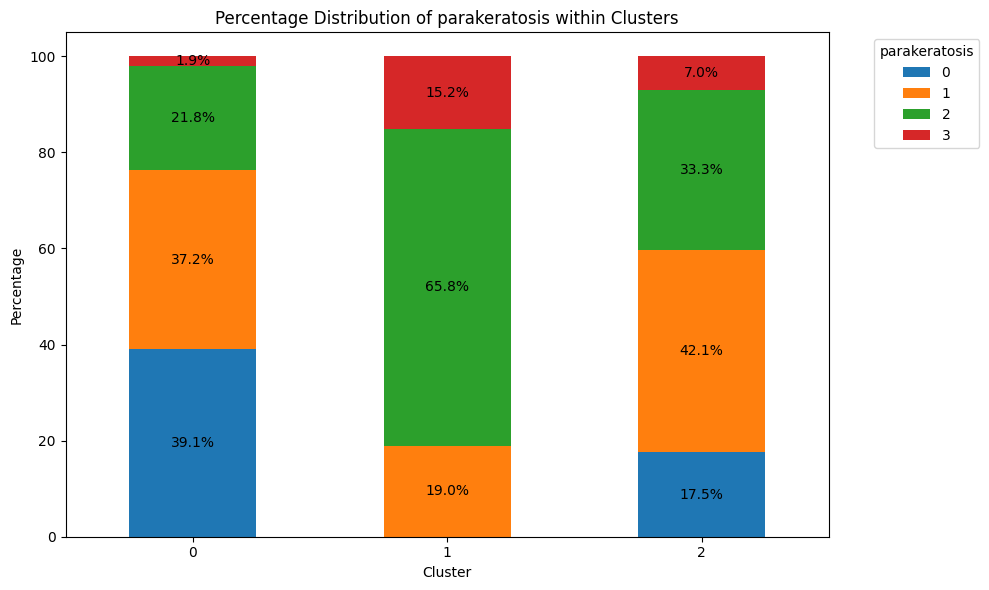


--- Distribution of clubbing_rete_ridges within Clusters ---


clubbing_rete_ridges,0,1,2,3
clusters,,,,
0,150,3,2,1
1,2,9,41,27
2,57,0,0,0


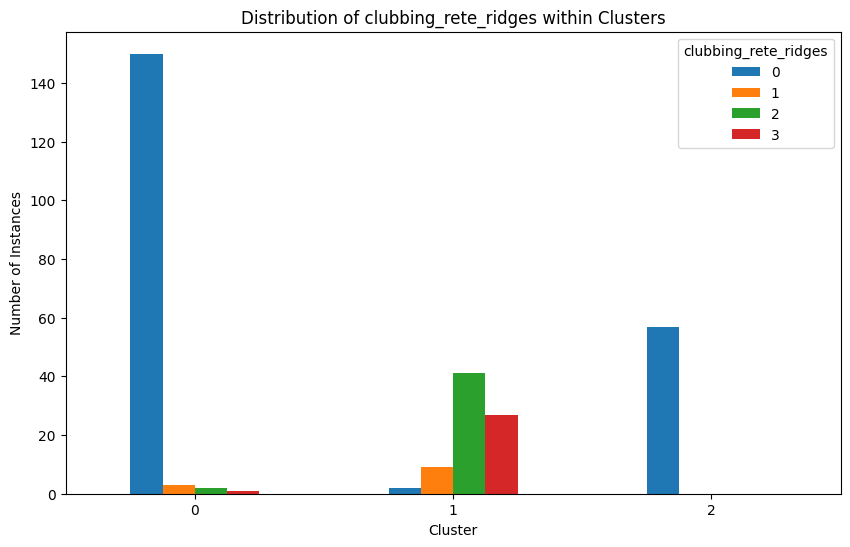


Percentage Distribution of clubbing_rete_ridges within Clusters:


clubbing_rete_ridges,0,1,2,3
clusters,,,,
0,96.153846,1.923077,1.282051,0.641026
1,2.531646,11.392405,51.898734,34.177215
2,100.000000,0.000000,0.000000,0.000000


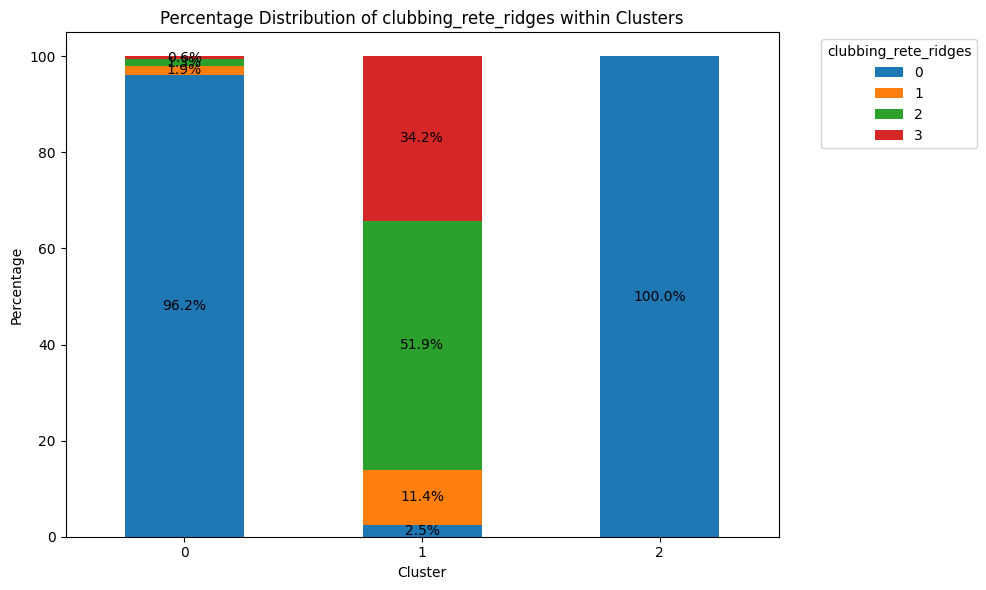


--- Distribution of elongation_rete_ridges within Clusters ---


elongation_rete_ridges,0,1,2,3
clusters,,,,
0,109,9,27,11
1,0,7,43,29
2,57,0,0,0


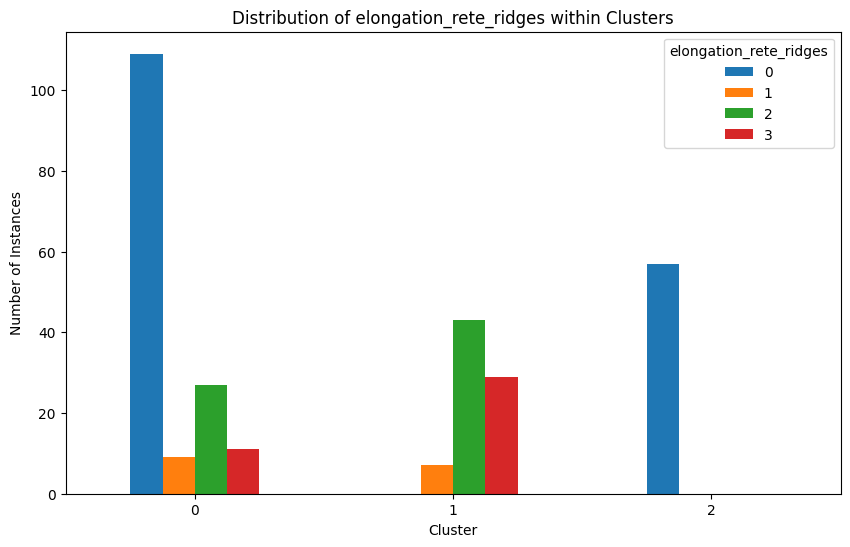


Percentage Distribution of elongation_rete_ridges within Clusters:


elongation_rete_ridges,0,1,2,3
clusters,,,,
0,69.871795,5.769231,17.307692,7.051282
1,0.000000,8.860759,54.430380,36.708861
2,100.000000,0.000000,0.000000,0.000000


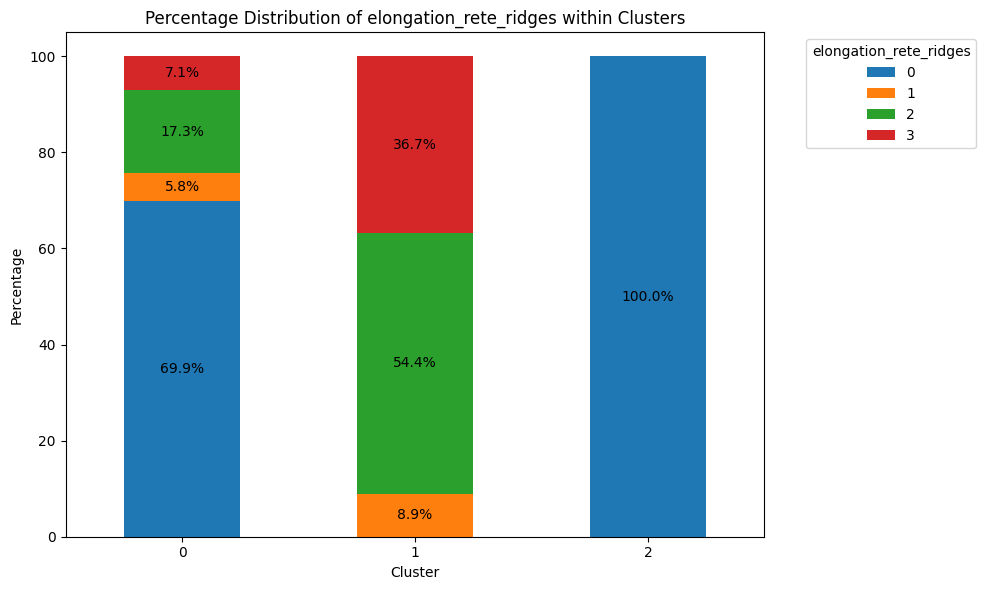


--- Distribution of thinning_suprapapillary_epidermis within Clusters ---


thinning_suprapapillary_epidermis,0,1,2,3
clusters,,,,
0,152,1,1,2
1,5,11,39,24
2,57,0,0,0


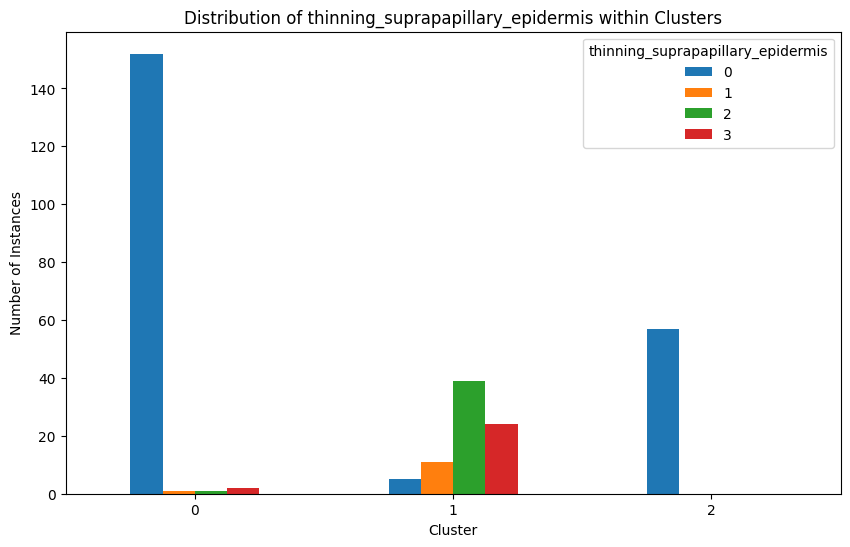


Percentage Distribution of thinning_suprapapillary_epidermis within Clusters:


thinning_suprapapillary_epidermis,0,1,2,3
clusters,,,,
0,97.435897,0.641026,0.641026,1.282051
1,6.329114,13.924051,49.367089,30.379747
2,100.000000,0.000000,0.000000,0.000000


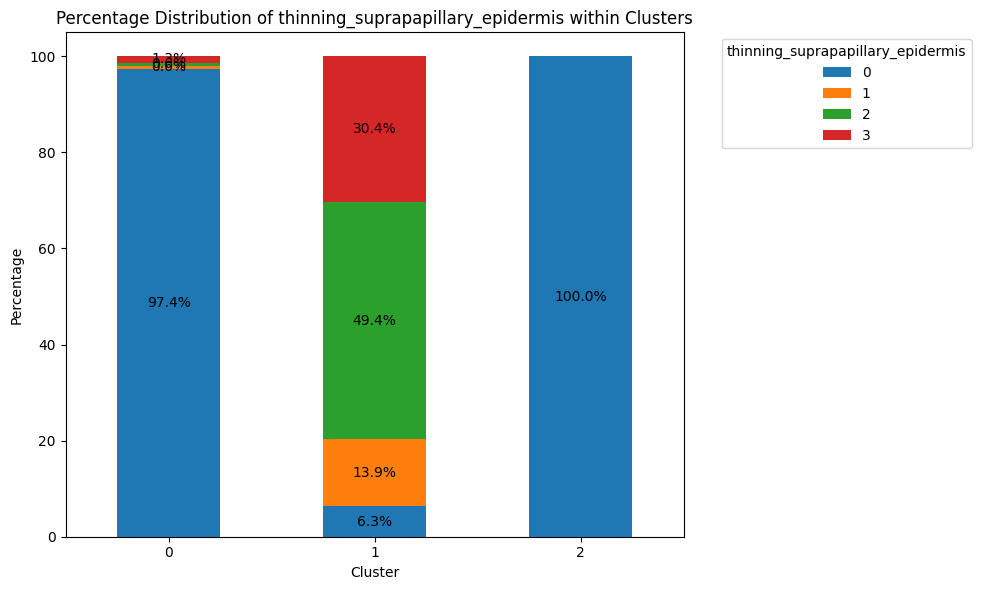


--- Distribution of spongiform_pustule within Clusters ---


spongiform_pustule,0,1,2,3
clusters,,,,
0,149,4,3,0
1,34,21,19,5
2,57,0,0,0


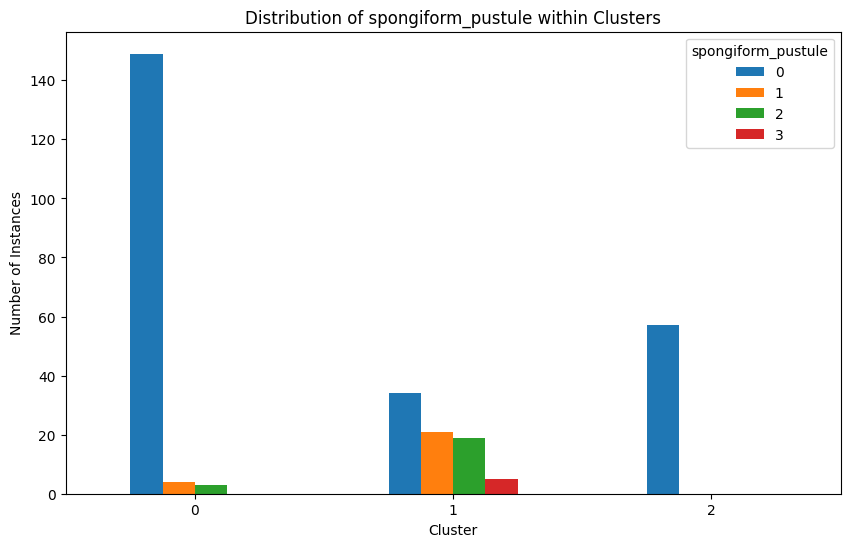


Percentage Distribution of spongiform_pustule within Clusters:


spongiform_pustule,0,1,2,3
clusters,,,,
0,95.512821,2.564103,1.923077,0.000000
1,43.037975,26.582278,24.050633,6.329114
2,100.000000,0.000000,0.000000,0.000000


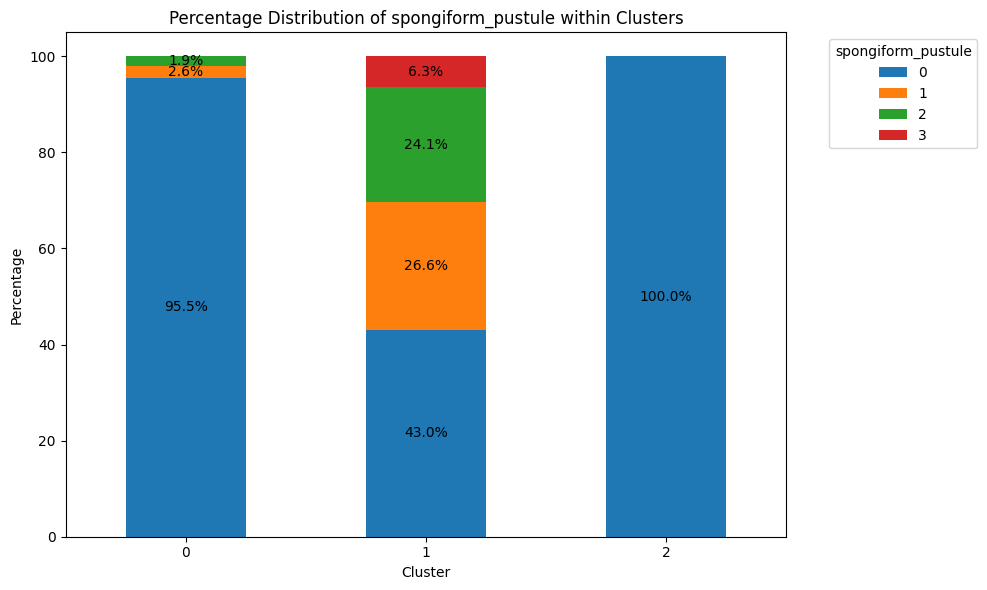


--- Distribution of munro_microabcess within Clusters ---


munro_microabcess,0,1,2,3
clusters,,,,
0,154,1,0,1
1,24,23,25,7
2,57,0,0,0


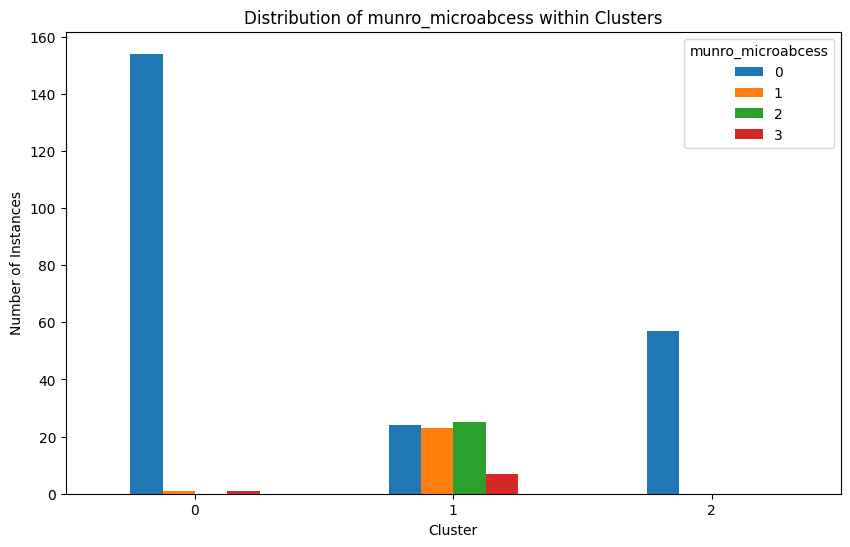


Percentage Distribution of munro_microabcess within Clusters:


munro_microabcess,0,1,2,3
clusters,,,,
0,98.717949,0.641026,0.00000,0.641026
1,30.379747,29.113924,31.64557,8.860759
2,100.000000,0.000000,0.00000,0.000000


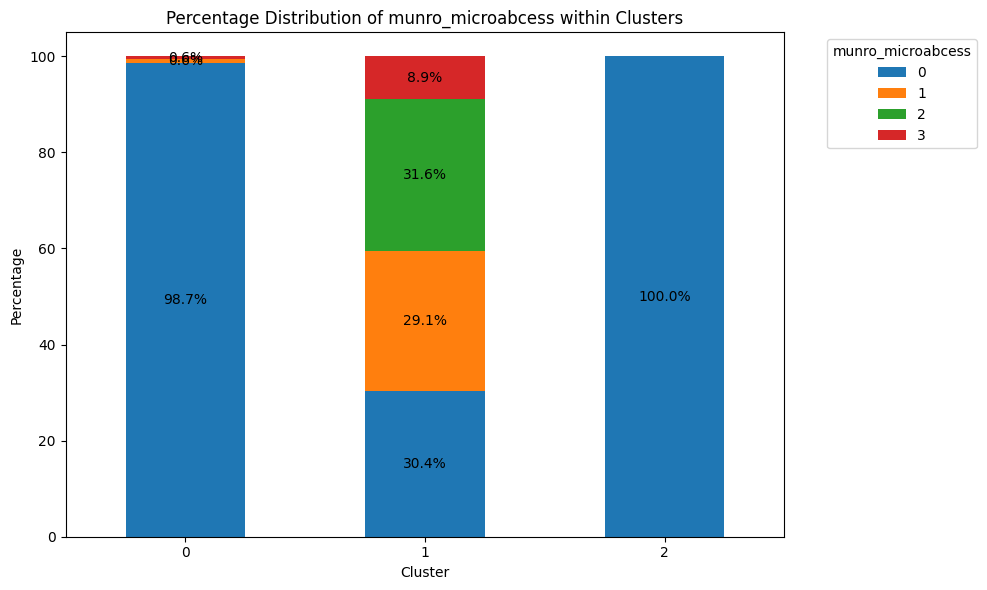


--- Distribution of focal_hypergranulosis within Clusters ---


focal_hypergranulosis,0,1,2,3
clusters,,,,
0,154,2,0,0
1,79,0,0,0
2,1,8,35,13


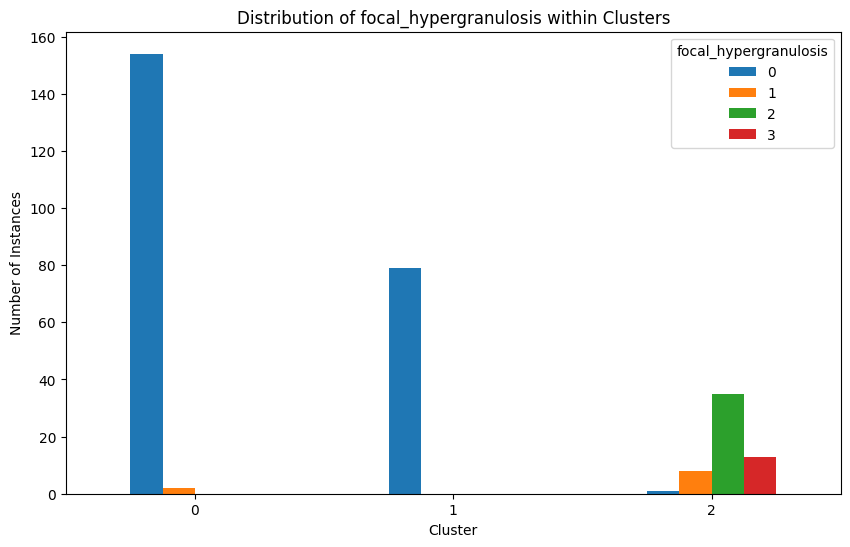


Percentage Distribution of focal_hypergranulosis within Clusters:


focal_hypergranulosis,0,1,2,3
clusters,,,,
0,98.717949,1.282051,0.000000,0.000000
1,100.000000,0.000000,0.000000,0.000000
2,1.754386,14.035088,61.403509,22.807018


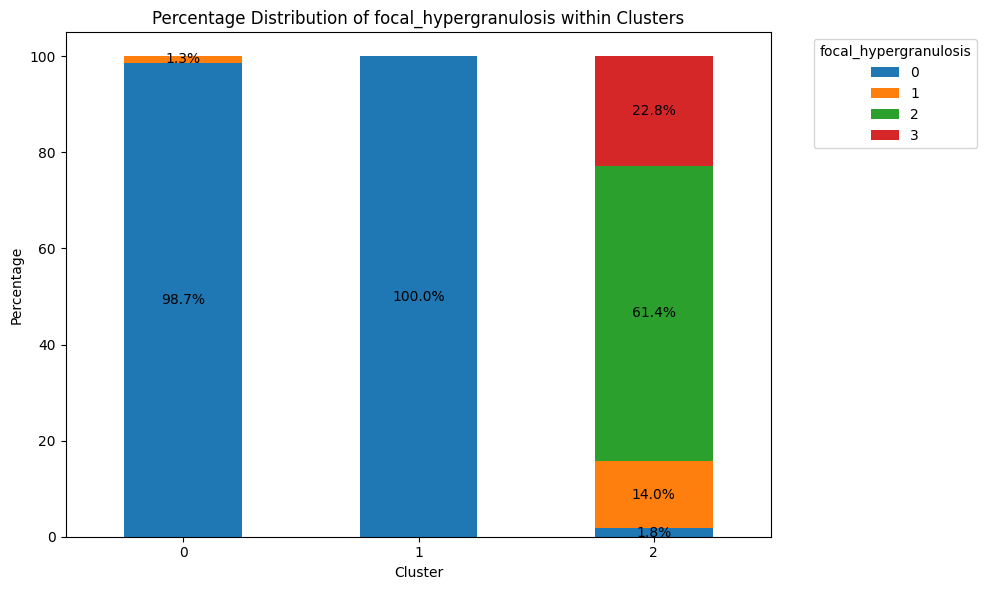


--- Distribution of disappearance_granular_layer within Clusters ---


disappearance_granular_layer,0,1,2,3
clusters,,,,
0,141,14,1,0
1,30,10,27,12
2,49,1,7,0


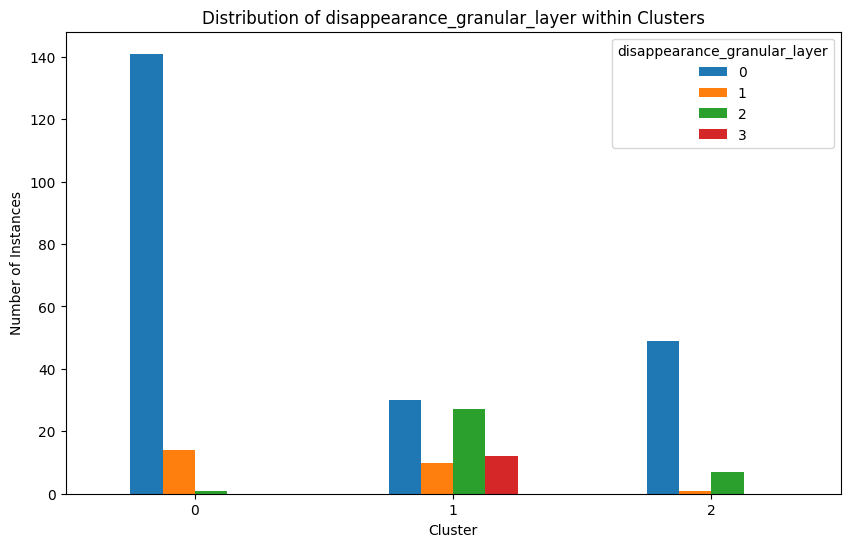


Percentage Distribution of disappearance_granular_layer within Clusters:


disappearance_granular_layer,0,1,2,3
clusters,,,,
0,90.384615,8.974359,0.641026,0.000000
1,37.974684,12.658228,34.177215,15.189873
2,85.964912,1.754386,12.280702,0.000000


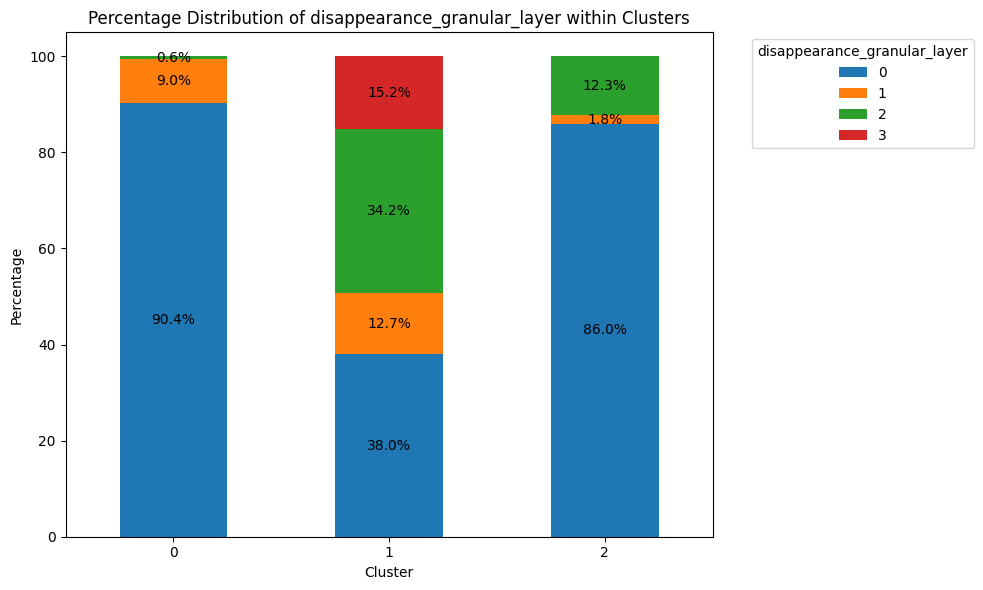


--- Distribution of vacuolisation_damage_basal_layer within Clusters ---


vacuolisation_damage_basal_layer,0,1,2,3
clusters,,,,
0,155,0,0,1
1,78,1,0,0
2,0,2,35,20


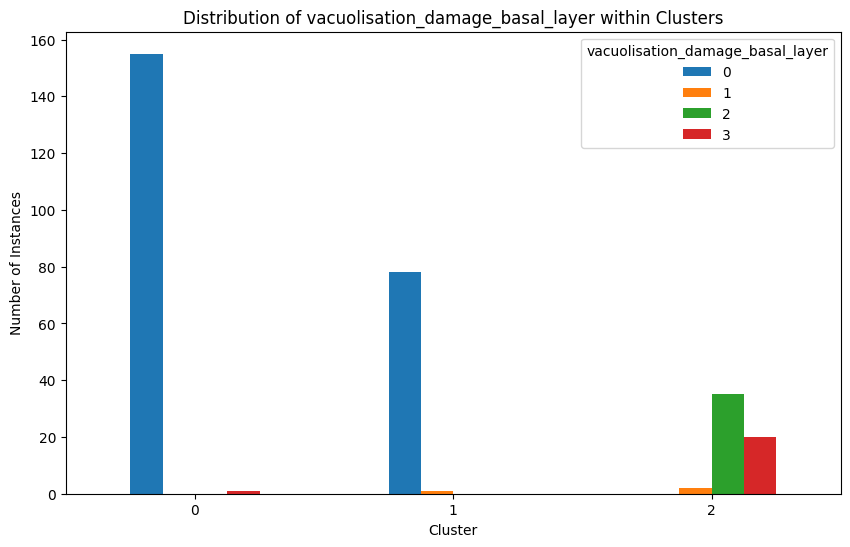


Percentage Distribution of vacuolisation_damage_basal_layer within Clusters:


vacuolisation_damage_basal_layer,0,1,2,3
clusters,,,,
0,99.358974,0.000000,0.000000,0.641026
1,98.734177,1.265823,0.000000,0.000000
2,0.000000,3.508772,61.403509,35.087719


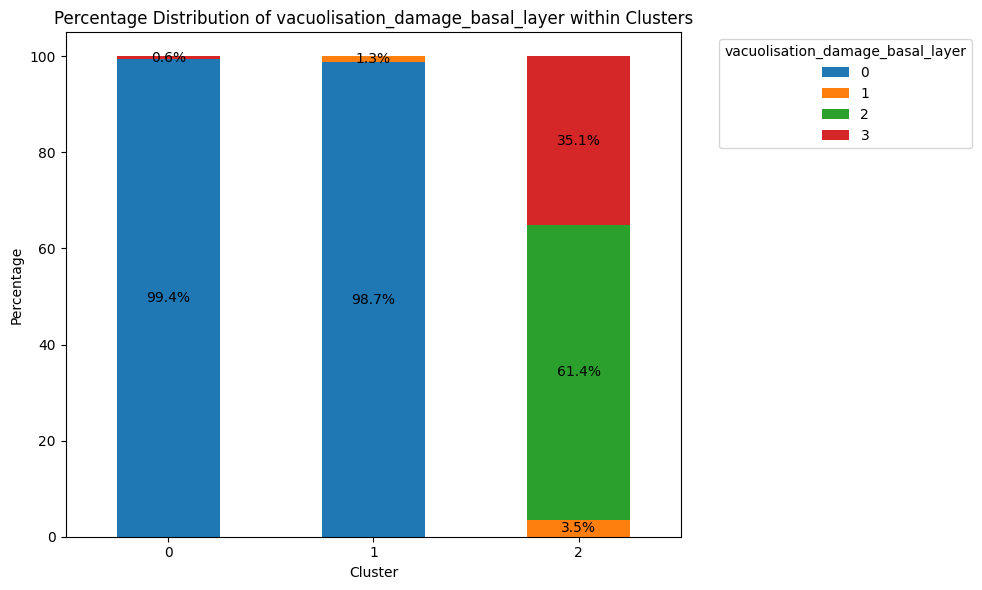


--- Distribution of spongiosis within Clusters ---


spongiosis,0,1,2,3
clusters,,,,
0,48,16,67,25
1,79,0,0,0
2,24,6,18,9


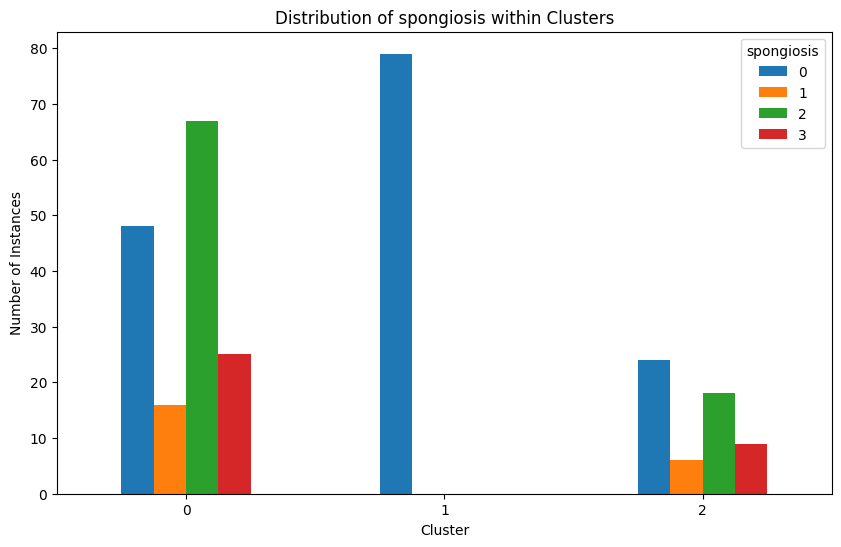


Percentage Distribution of spongiosis within Clusters:


spongiosis,0,1,2,3
clusters,,,,
0,30.769231,10.256410,42.948718,16.025641
1,100.000000,0.000000,0.000000,0.000000
2,42.105263,10.526316,31.578947,15.789474


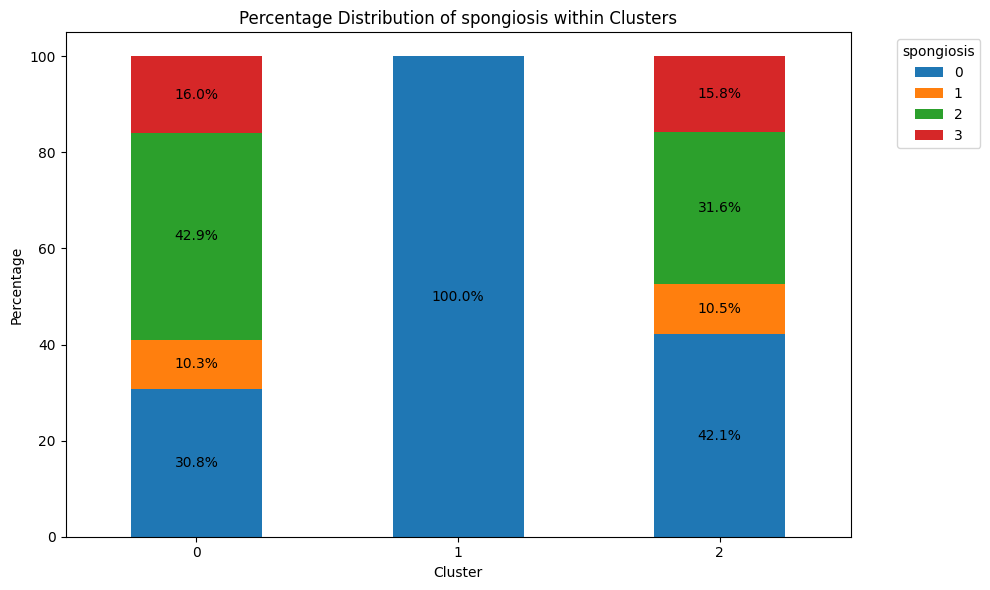


--- Distribution of saw_tooth_appearance_retes within Clusters ---


saw_tooth_appearance_retes,0,1,2,3
clusters,,,,
0,153,1,1,1
1,79,0,0,0
2,1,2,30,24


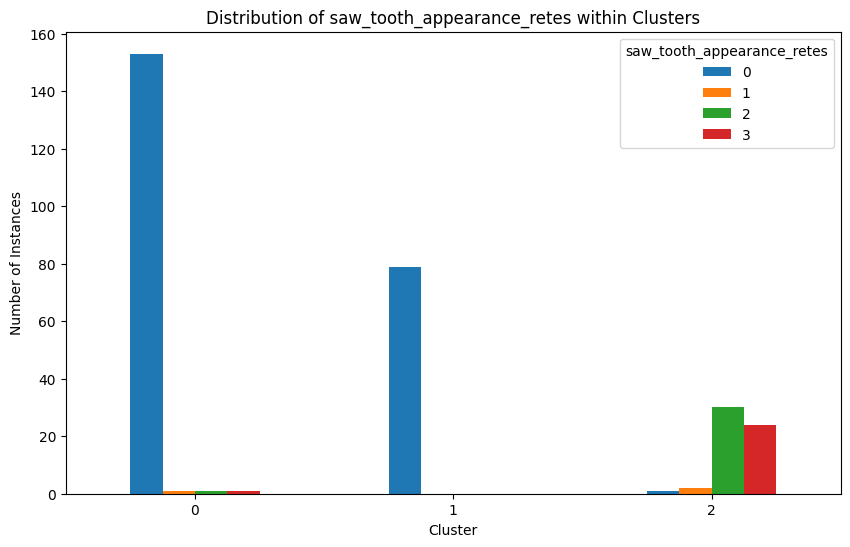


Percentage Distribution of saw_tooth_appearance_retes within Clusters:


saw_tooth_appearance_retes,0,1,2,3
clusters,,,,
0,98.076923,0.641026,0.641026,0.641026
1,100.000000,0.000000,0.000000,0.000000
2,1.754386,3.508772,52.631579,42.105263


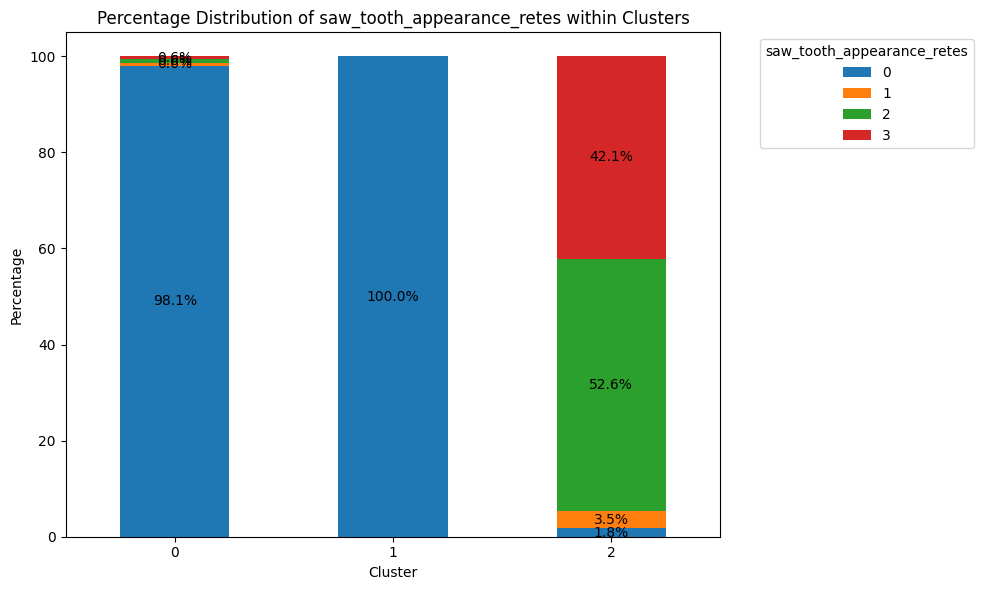


--- Distribution of follicular_horn_plug within Clusters ---


follicular_horn_plug,0,1,2,3
clusters,,,,
0,140,7,5,4
1,78,1,0,0
2,56,1,0,0


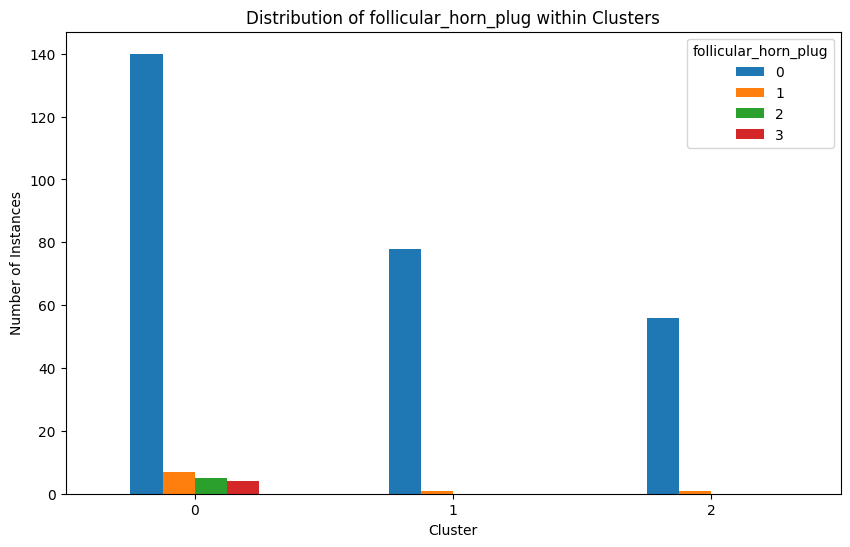


Percentage Distribution of follicular_horn_plug within Clusters:


follicular_horn_plug,0,1,2,3
clusters,,,,
0,89.743590,4.487179,3.205128,2.564103
1,98.734177,1.265823,0.000000,0.000000
2,98.245614,1.754386,0.000000,0.000000


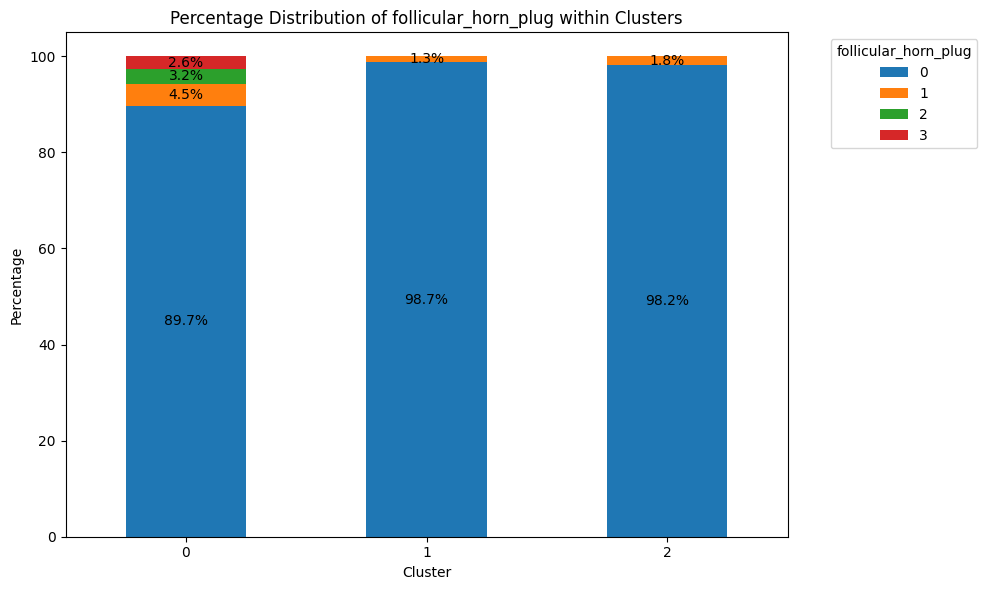


--- Distribution of perifollicular_parakeratosis within Clusters ---


perifollicular_parakeratosis,0,1,2,3
clusters,,,,
0,139,4,10,3
1,78,0,1,0
2,57,0,0,0


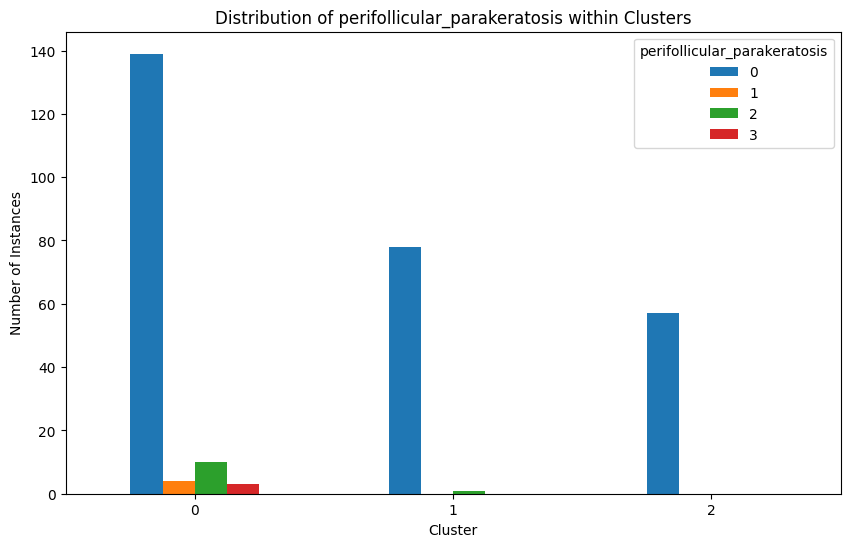


Percentage Distribution of perifollicular_parakeratosis within Clusters:


perifollicular_parakeratosis,0,1,2,3
clusters,,,,
0,89.102564,2.564103,6.410256,1.923077
1,98.734177,0.000000,1.265823,0.000000
2,100.000000,0.000000,0.000000,0.000000


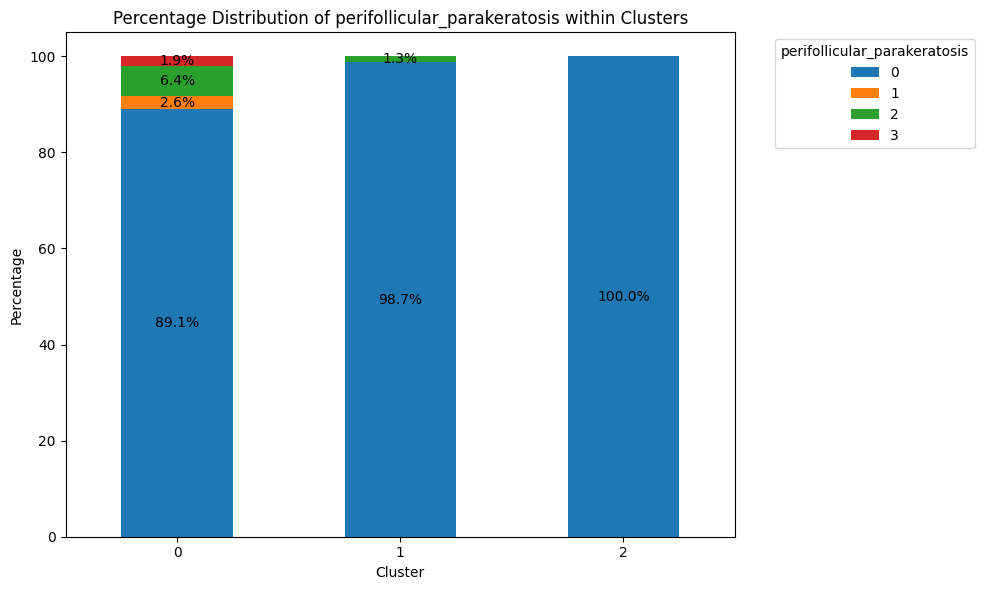


--- Distribution of inflammatory_mononuclear_infiltrate within Clusters ---


inflammatory_mononuclear_infiltrate,0,1,2,3
clusters,,,,
0,6,49,80,21
1,2,15,49,13
2,1,3,39,14


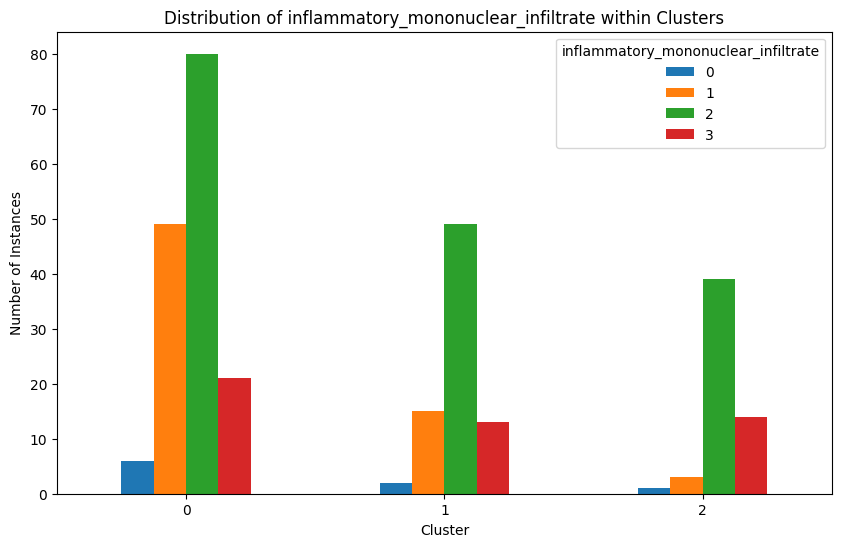


Percentage Distribution of inflammatory_mononuclear_infiltrate within Clusters:


inflammatory_mononuclear_infiltrate,0,1,2,3
clusters,,,,
0,3.846154,31.410256,51.282051,13.461538
1,2.531646,18.987342,62.025316,16.455696
2,1.754386,5.263158,68.421053,24.561404


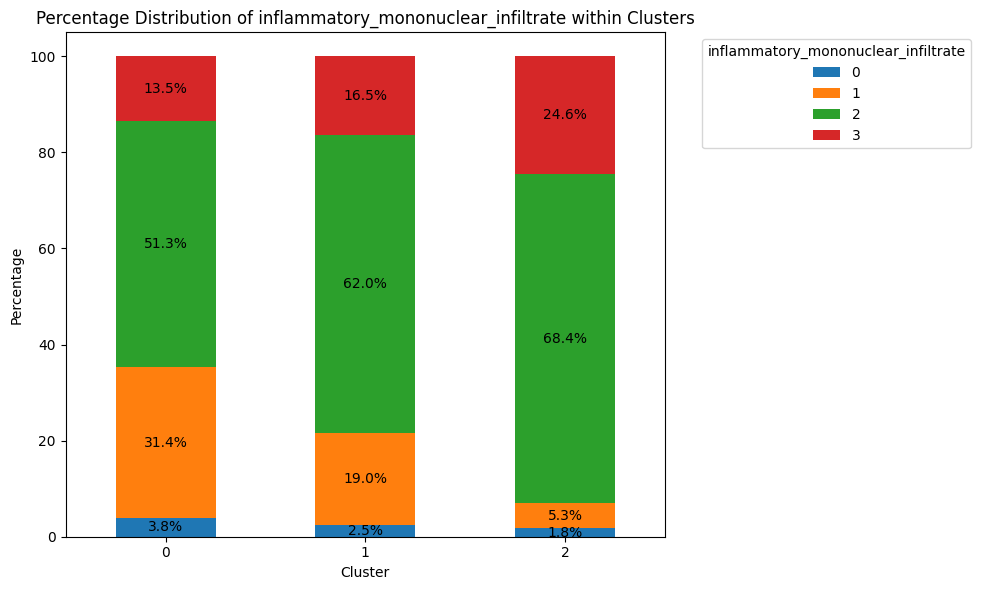


--- Distribution of band_like_infiltrate within Clusters ---


band_like_infiltrate,0,1,2,3
clusters,,,,
0,151,2,2,1
1,79,0,0,0
2,0,0,17,40


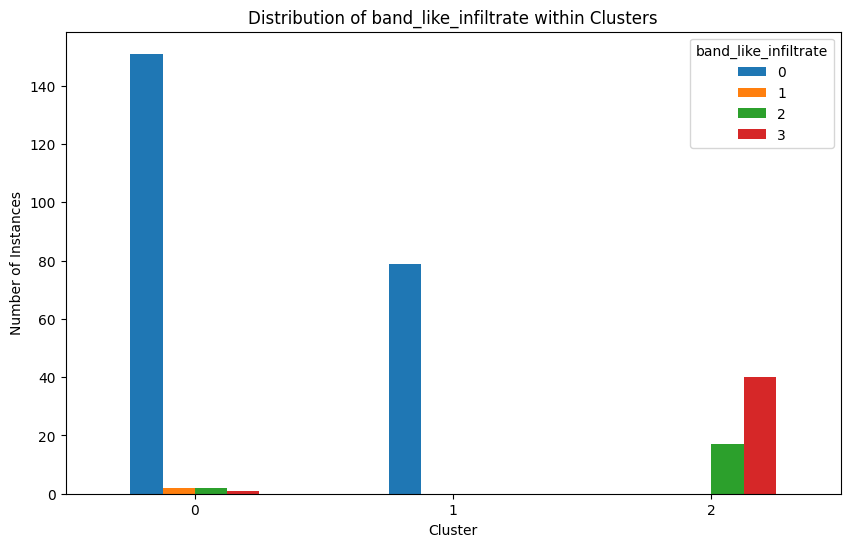


Percentage Distribution of band_like_infiltrate within Clusters:


band_like_infiltrate,0,1,2,3
clusters,,,,
0,96.794872,1.282051,1.282051,0.641026
1,100.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,29.824561,70.175439


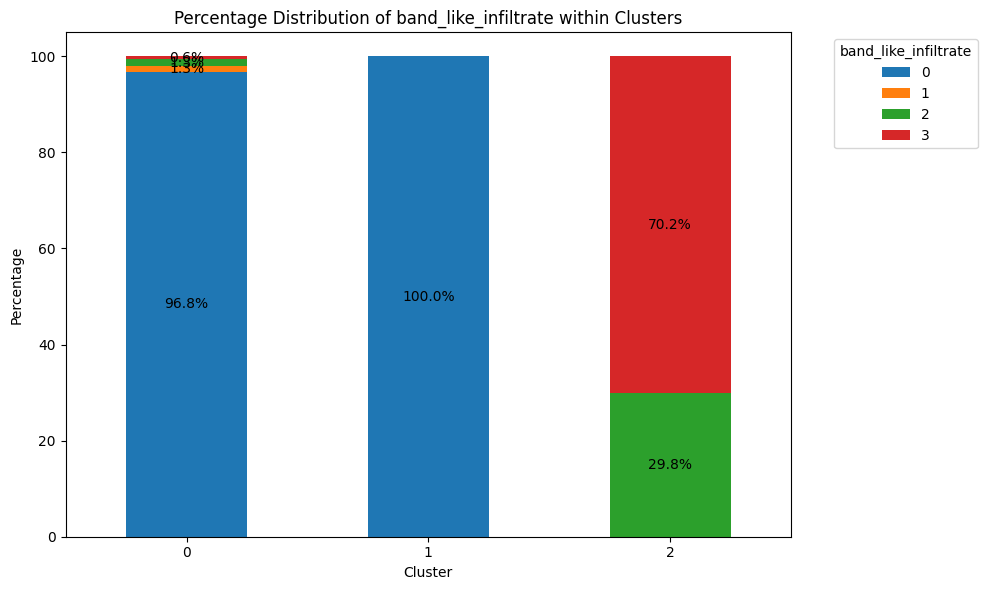

In [ ]:
# prompt: i want to get how each features distributes in clusters how can i get?

import matplotlib.pyplot as plt
# Analyze the distribution of categorical features within clusters
print("\nCategorical Feature Distribution within Clusters:")

# Get the list of original categorical column names (excluding 'age' and 'class')
# Based on your preprocessing, the original categorical columns are the first 33 columns.
original_categorical_cols = df.drop(['age', 'class'], axis=1).columns[:33]

for col in original_categorical_cols:
    print(f"\n--- Distribution of {col} within Clusters ---")
    # Group by cluster and then by the categorical feature, count occurrences
    feature_distribution = train_df_with_clusters_original_age.groupby('clusters')[col].value_counts().unstack(fill_value=0)
    display(feature_distribution)

    # Plot the distribution for each cluster
    feature_distribution.plot(kind='bar', stacked=False, figsize=(10, 6))
    plt.title(f'Distribution of {col} within Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Instances')
    plt.xticks(rotation=0)
    plt.legend(title=col)
    plt.show()

    # Optional: Plot the percentage distribution within each cluster
    feature_distribution_percentage = feature_distribution.apply(lambda x: x / x.sum() * 100, axis=1)
    print(f"\nPercentage Distribution of {col} within Clusters:")
    display(feature_distribution_percentage)

    feature_distribution_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Percentage Distribution of {col} within Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add text labels for percentages on the stacked bars
    for container in plt.gca().containers:
        labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in container]
        plt.bar_label(container, labels=labels, label_type='center')

    plt.tight_layout()
    plt.show()



In [ ]:
# prompt: apply kruskal wallis test to check whether there is any significance difference in age between clusters

from scipy import stats

# Create a list of age values for each cluster
cluster_ages = [train_data_with_clusters[train_data_with_clusters['clusters'] == i]['age'].dropna() for i in sorted(train_data_with_clusters['clusters'].unique())]

# Check if there are at least two non-empty groups to compare
if len(cluster_ages) > 1 and all(len(group) > 0 for group in cluster_ages):
    # Perform Kruskal-Wallis test
    stat, p_value = stats.kruskal(*cluster_ages)

    print("\nKruskal-Wallis H-test for Age across Clusters:")
    print(f"Test Statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Interpret the result
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("Result: Reject the null hypothesis. There is a statistically significant difference in the median age between the clusters.")
    else:
        print("Result: Fail to reject the null hypothesis. There is no statistically significant difference in the median age between the clusters.")
else:
    print("\nKruskal-Wallis test could not be performed. Ensure there are at least two clusters with non-empty age data.")



Kruskal-Wallis H-test for Age across Clusters:
Test Statistic: 19.0828
P-value: 0.0001
Result: Reject the null hypothesis. There is a statistically significant difference in the median age between the clusters.


In [ ]:
train_data_with_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   erythema                             292 non-null    float64 
 1   scaling                              292 non-null    float64 
 2   definite_borders                     292 non-null    float64 
 3   itching                              292 non-null    float64 
 4   koebner_phenomenon                   292 non-null    float64 
 5   polygonal_papules                    292 non-null    float64 
 6   follicular_papules                   292 non-null    float64 
 7   oral_mucosal_involvement             292 non-null    float64 
 8   knee_and_elbow_involvement           292 non-null    float64 
 9   scalp_involvement                    292 non-null    float64 
 10  family_history                       292 non-null    float64 
 11  melanin_incontinenc